# Import Libraries

In [162]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [163]:
# Read the Loan_Modelling.csv files and load into data frame
Loan_df = pd.read_csv("Loan_Modelling.csv")  

In [164]:
Loan_df_copy = Loan_df.copy()
Loan_df.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

# 1. Define the problem and perform an Exploratory Data Analysis

### 1.1 Problem statement:

AllLife Bank is a US Bank who has majority of depositors and less borrowers. The bank would like to find some ways to 
convert its depositor customers to personal loan customers. 
As a data scientist, we would be building a model based on the last year campaign data,that will help to find 
potential customers who have high chance of purchasing loan. 

### 1.2 Observations on Data

In [165]:
#Shape of the data (rows and columns)
print('There are :', Loan_df.shape[0] ,'rows and', Loan_df.shape[1], 'columns')

There are : 5000 rows and 14 columns


In [166]:
#To view dataframe details
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


1. Except CCAvg feature, all the feature are integers. CCAvg is average credit card expenditure per month, which is a float datatype
2. There is no null record for any of the feature.

In [167]:
Loan_df.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [168]:
Loan_df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

1. The data is for customers whose age is between 23 and 67 (inclusive). 
2. The customers have experience upto 43 year and minimum of -3 years. The experience cannot be in negative,so we will treat them in data preprocessing.
3. The Income is between 8 thousand dollars and 224 thousand dollars
4. The Family size is between 1 to 4 members
5. The Creditcard expense per month is between zero and 10 thousand dollars. We have some customer who don't any credit card 
   usages. 
6. All the customers are educated.
7. Most customer don't have house mortgage. Some have maximum upto 635 thousand dollars. The data looks right Skewed.
8. Most of customers don't have Personal loan, Securities account, Certificate of deposits.
9. Most of customers have online banking.
10. Some of customers have Credit card from other banks.

In [169]:
Loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

The features are of integer and float data type

In [170]:
# Personal_Loan should be a categorical variable
Loan_df["Personal_Loan"] = Loan_df["Personal_Loan"].astype("category")

In [171]:
# To find for any missing values
pd.DataFrame(
    data={
        "% of Missing Values": round(Loan_df.isna().sum() / Loan_df.isna().count() * 100, 2)
    }
)


% of Missing Values
ID                                  0.0
Age                                 0.0
Experience                          0.0
Income                              0.0
ZIPCode                             0.0
Family                              0.0
CCAvg                               0.0
Education                           0.0
Mortgage                            0.0
Personal_Loan                       0.0
Securities_Account                  0.0
CD_Account                          0.0
Online                              0.0
CreditCard                          0.0

There are no null values in any of the feature.

In [172]:
Loan_df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [173]:
print(Loan_df.Mortgage.value_counts())
print(Loan_df.Personal_Loan.value_counts())
print(Loan_df.Securities_Account.value_counts())
print(Loan_df.CD_Account.value_counts())
print(Loan_df.Online.value_counts())
print(Loan_df.CreditCard.value_counts())

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


1. Personal loan - 4520 customers don't have Personal loan and 480 customers have. Its like only 9.6% have purchased personal loan.
2. Securities Account - 522 customers have Securities Account and 4478 don't have. Its 10.44% have Securities Account.
3. certificate of deposit - 302 customers have certificate of deposit(CD) and 4698 don't have. Its 6% have certificate of deposit(CD).
4. internet banking - 2984 customers have internet banking and 2016 don't have. Almost 60% have internet banking.
5. other Credit card - 1470 customers have other banks credit card and 3530 don't have. Almost 29.4% uses other banks credit card.

### Data Preparation
- Converting monthly values to yearly, Logistic Regression depends on the scale of the variables so it helps to have variables with similar scale or small scale. 
- The Average spending on credit cards is given in monthly. Since Income of customer is in yearly, we will convert Average spending on credit cards per month to Yearly.

In [174]:
Loan_df['CCAvg'] = Loan_df['CCAvg'] * 12 
Loan_df

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4   19.2          1   
1        2   45          19      34    90089       3   18.0          1   
2        3   39          15      11    94720       1   12.0          1   
3        4   35           9     100    94112       1   32.4          2   
4        5   35           8      45    91330       4   12.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1   22.8          3   
4996  4997   30           4      15    92037       4    4.8          1   
4997  4998   63          39      24    93023       2    3.6          3   
4998  4999   65          40      49    90034       3    6.0          2   
4999  5000   28           4      83    92612       3    9.6          1   

      Mortgage Personal_Loan  Securities_Account  CD_Account  Online  \
0            0             0                   1           0       0   
1            0             0                   1           0       0   
2            0             0                   0           0       0   
3            0             0                   0           0       0   
4            0             0                   0           0       0   
...        ...           ...                 ...         ...     ...   
4995         0             0                   0           0       1   
4996        85             0                   0           0       1   
4997         0             0                   0           0       0   
4998         0             0                   0           0       1   
4999         0             0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

### 1.3 Univariate Analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

In [175]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on Age 

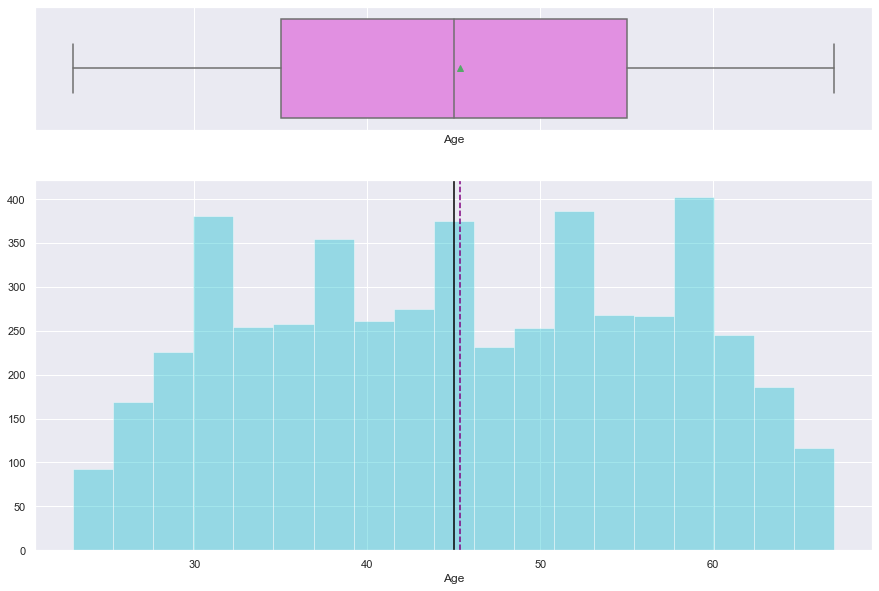

In [176]:
histogram_boxplot(Loan_df["Age"])

- The distribution of age is fully distributed. We don't see much Skewness in the distribution but a slight Positive skewness
- The boxplot shows that there is no outliers.
- There are customers at all ages between 23 and 67. 
- We can see most of the customers are at age groups - early 30's, late 30's, mid 40's, early 50's and late 50's
  

### Observation on Experience 

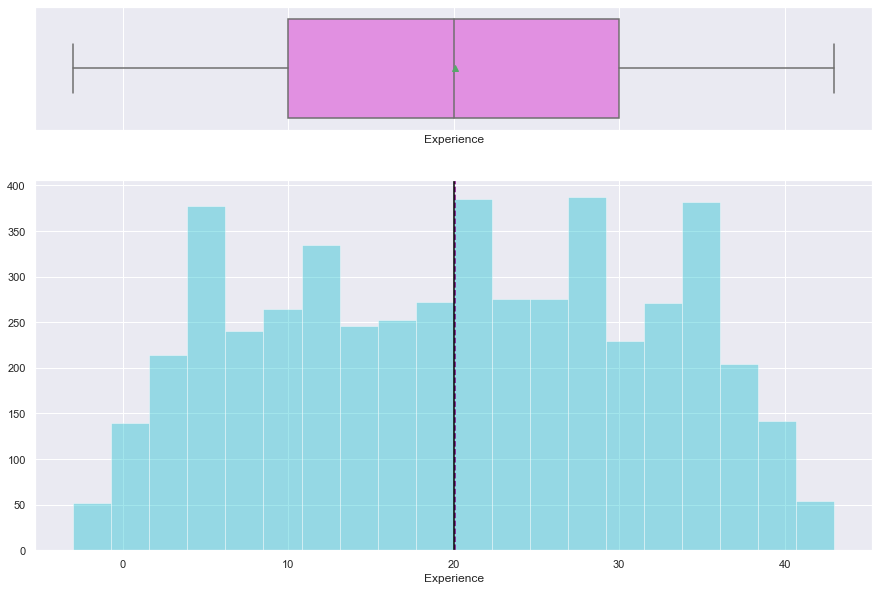

In [177]:
histogram_boxplot(Loan_df["Experience"])

- The distribution of Experience is fully distributed. We don't see any Skewness in the distribution.
- The boxplot shows that there is no outliers.
- The distribution shows some customers with less than zero experiences.This should be treated as missing values in data   
  preprocessing.
- The most of the customers are at experience years in 
    - 5 to 8 years
    - 20 to 22 years
    - 28 to 30 years
    - 36 to 38 years

### Observation on Income 

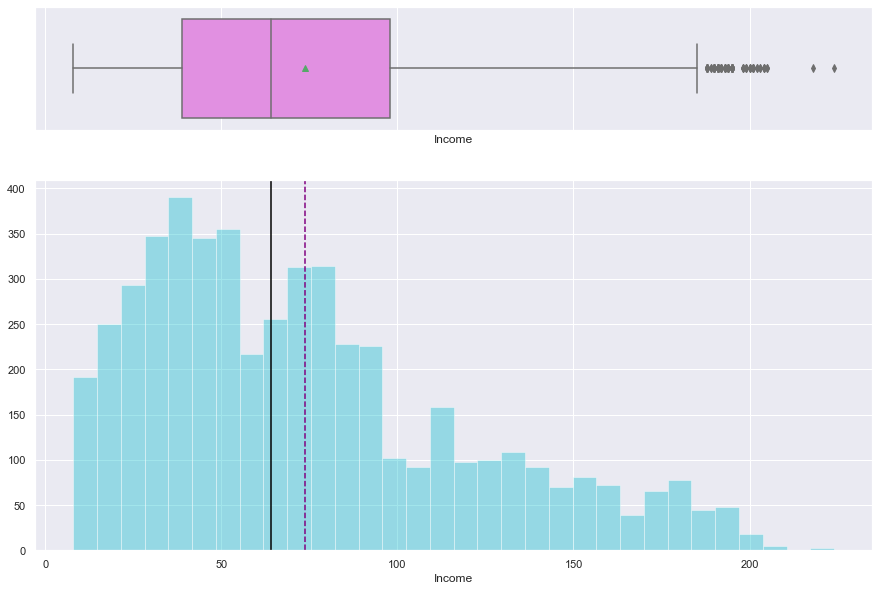

In [178]:
histogram_boxplot(Loan_df["Income"])

- The distribution of income is right skewed.
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real data
- The most of customers are in annual income 30 to 55 thousand dollars

### Observation on Zipcode 

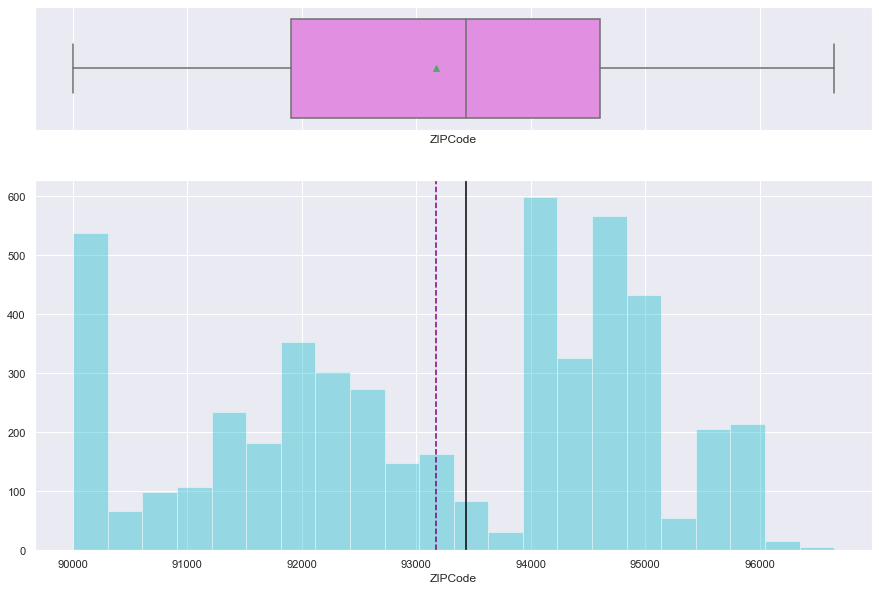

In [179]:
histogram_boxplot(Loan_df["ZIPCode"])

- The distribution of zipcode is not distributed evenly and has left skewness.
- The boxplot shows that there is no outliers i.e no other zipcodes outside than given range of zipcodes
- The most of customers belongs to certains zipcodes. For example, zipcode between 94000 to 94250

### Observation on CCAvg 

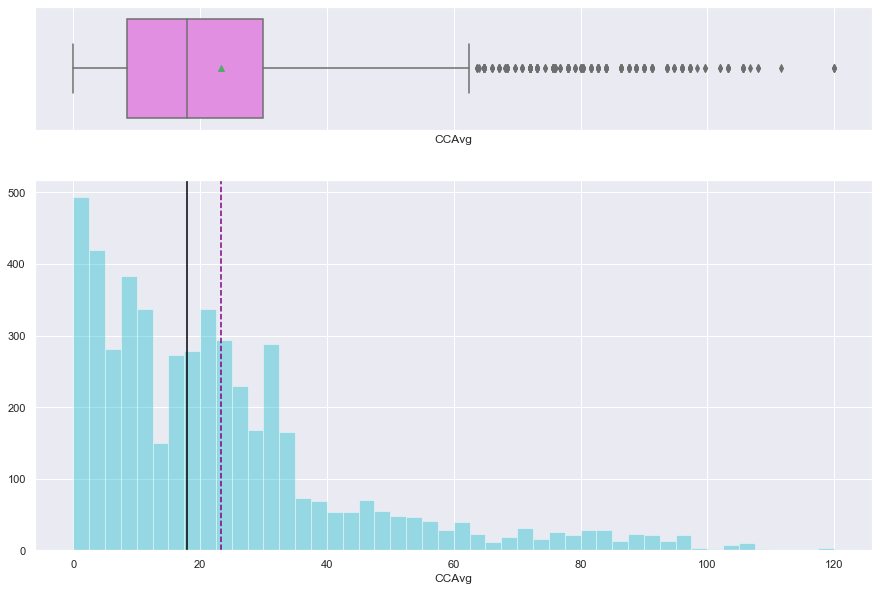

In [180]:
histogram_boxplot(Loan_df["CCAvg"])

- The distribution of average spending on credit cards per month is right skewed. 
- The most of the customers spend on credit card in range of zero to 3 thousand dollars 
- The Box plot shows some outliers on the right. 
- We will not treat these outliers as they are real market trend i.e some customers spends upto 10 thousand dollars.

### Observation on Mortgage 

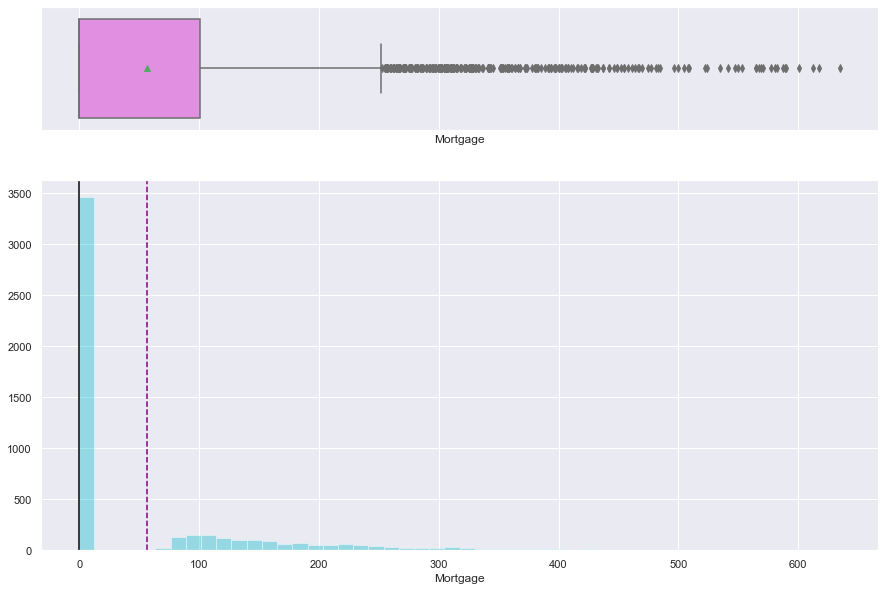

In [181]:
histogram_boxplot(Loan_df["Mortgage"])

- The distribution of Mortgage is right skewed. 
- The 3462 customers don't have any house mortgage. i.e 69% of customers doesn't have any house mortgage
- The remaining customers have mortgage between 60 to 635 thousand dollars.
- The boxplot shows that there are outliers at the right end
- These are considered as outliers because of 69% of customers don't have Mortgage. So we will not treat them as Outliers.

In [182]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Observation on Family 

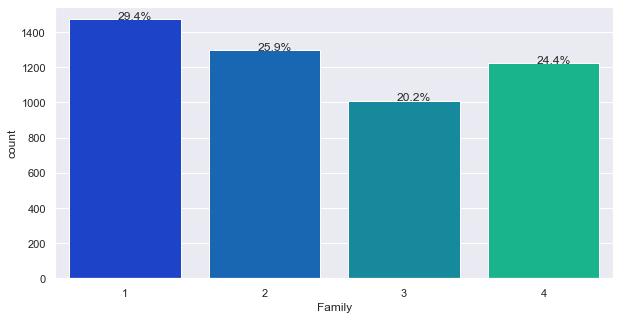

In [183]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["Family"], palette="winter")
perc_on_bar(ax, Loan_df["Family"])

- The customer have family of size 1 to 4 members.
- The maximum customer is having family of size 1 member.

### Observation on Education 

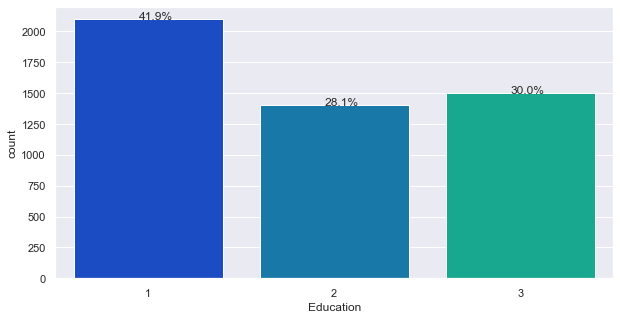

In [184]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["Education"], palette="winter")
perc_on_bar(ax, Loan_df["Education"])

- All customers are all educated. 
- The maximum customers are Undergrades, followed by Advanced/Professional and then Graduates

### Observation on Personal loan 

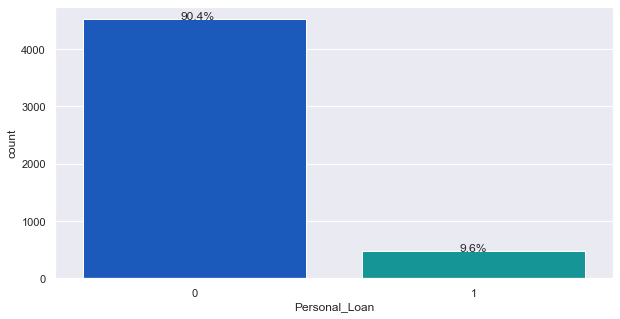

In [185]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["Personal_Loan"], palette="winter")
perc_on_bar(ax, Loan_df["Personal_Loan"])

- 9.6% of customers have got the personal loan offered in the last campaign.
- 90.4% of customers did not get the personal loan offered in the last campaign.

### Observation on Securities Account 

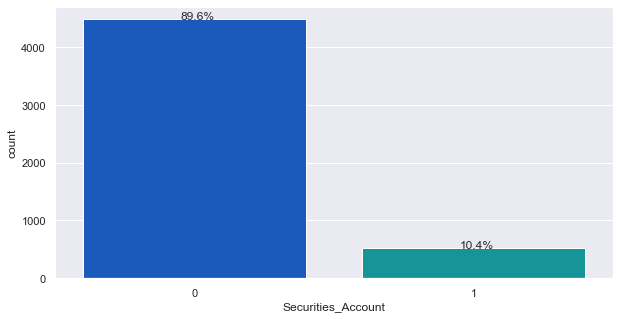

In [186]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["Securities_Account"], palette="winter")
perc_on_bar(ax, Loan_df["Securities_Account"])

- 10.4% of customers have got the securities account with the bank
- 89.6% of customers don't have the securities account with the bank

### Observation on CD Account 

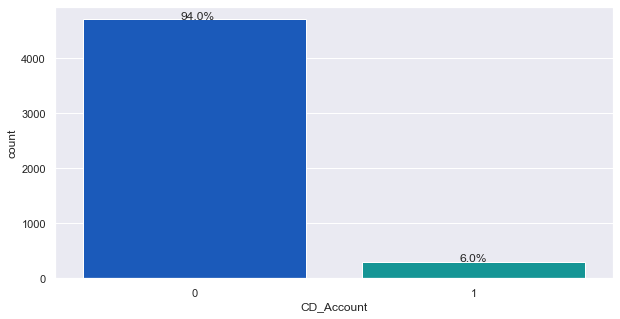

In [187]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["CD_Account"], palette="winter")
perc_on_bar(ax, Loan_df["CD_Account"])

- 6% of customers have a certificate of deposit (CD) account with the bank
- 94% of customers don't have certificate of deposit (CD) account with the bank

### Observation on Online

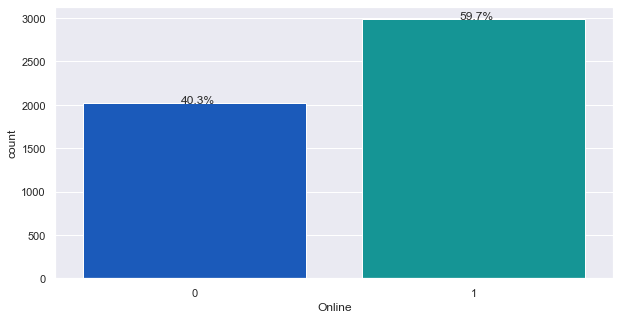

In [188]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["Online"], palette="winter")
perc_on_bar(ax, Loan_df["Online"])

- 59.7% of customers use internet banking facilities
- 40.3% of customers don't use internet banking facilities

### Observation on Creditcard

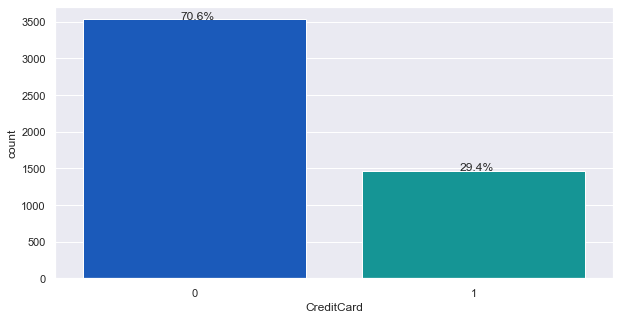

In [189]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Loan_df["CreditCard"], palette="winter")
perc_on_bar(ax, Loan_df["CreditCard"])

- 29.4% of customers have credit card issued by any other Bank (excluding All life Bank)
- 70.6% of customers doesn't have credit card issued by any other Bank

### 1.4 Bivariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

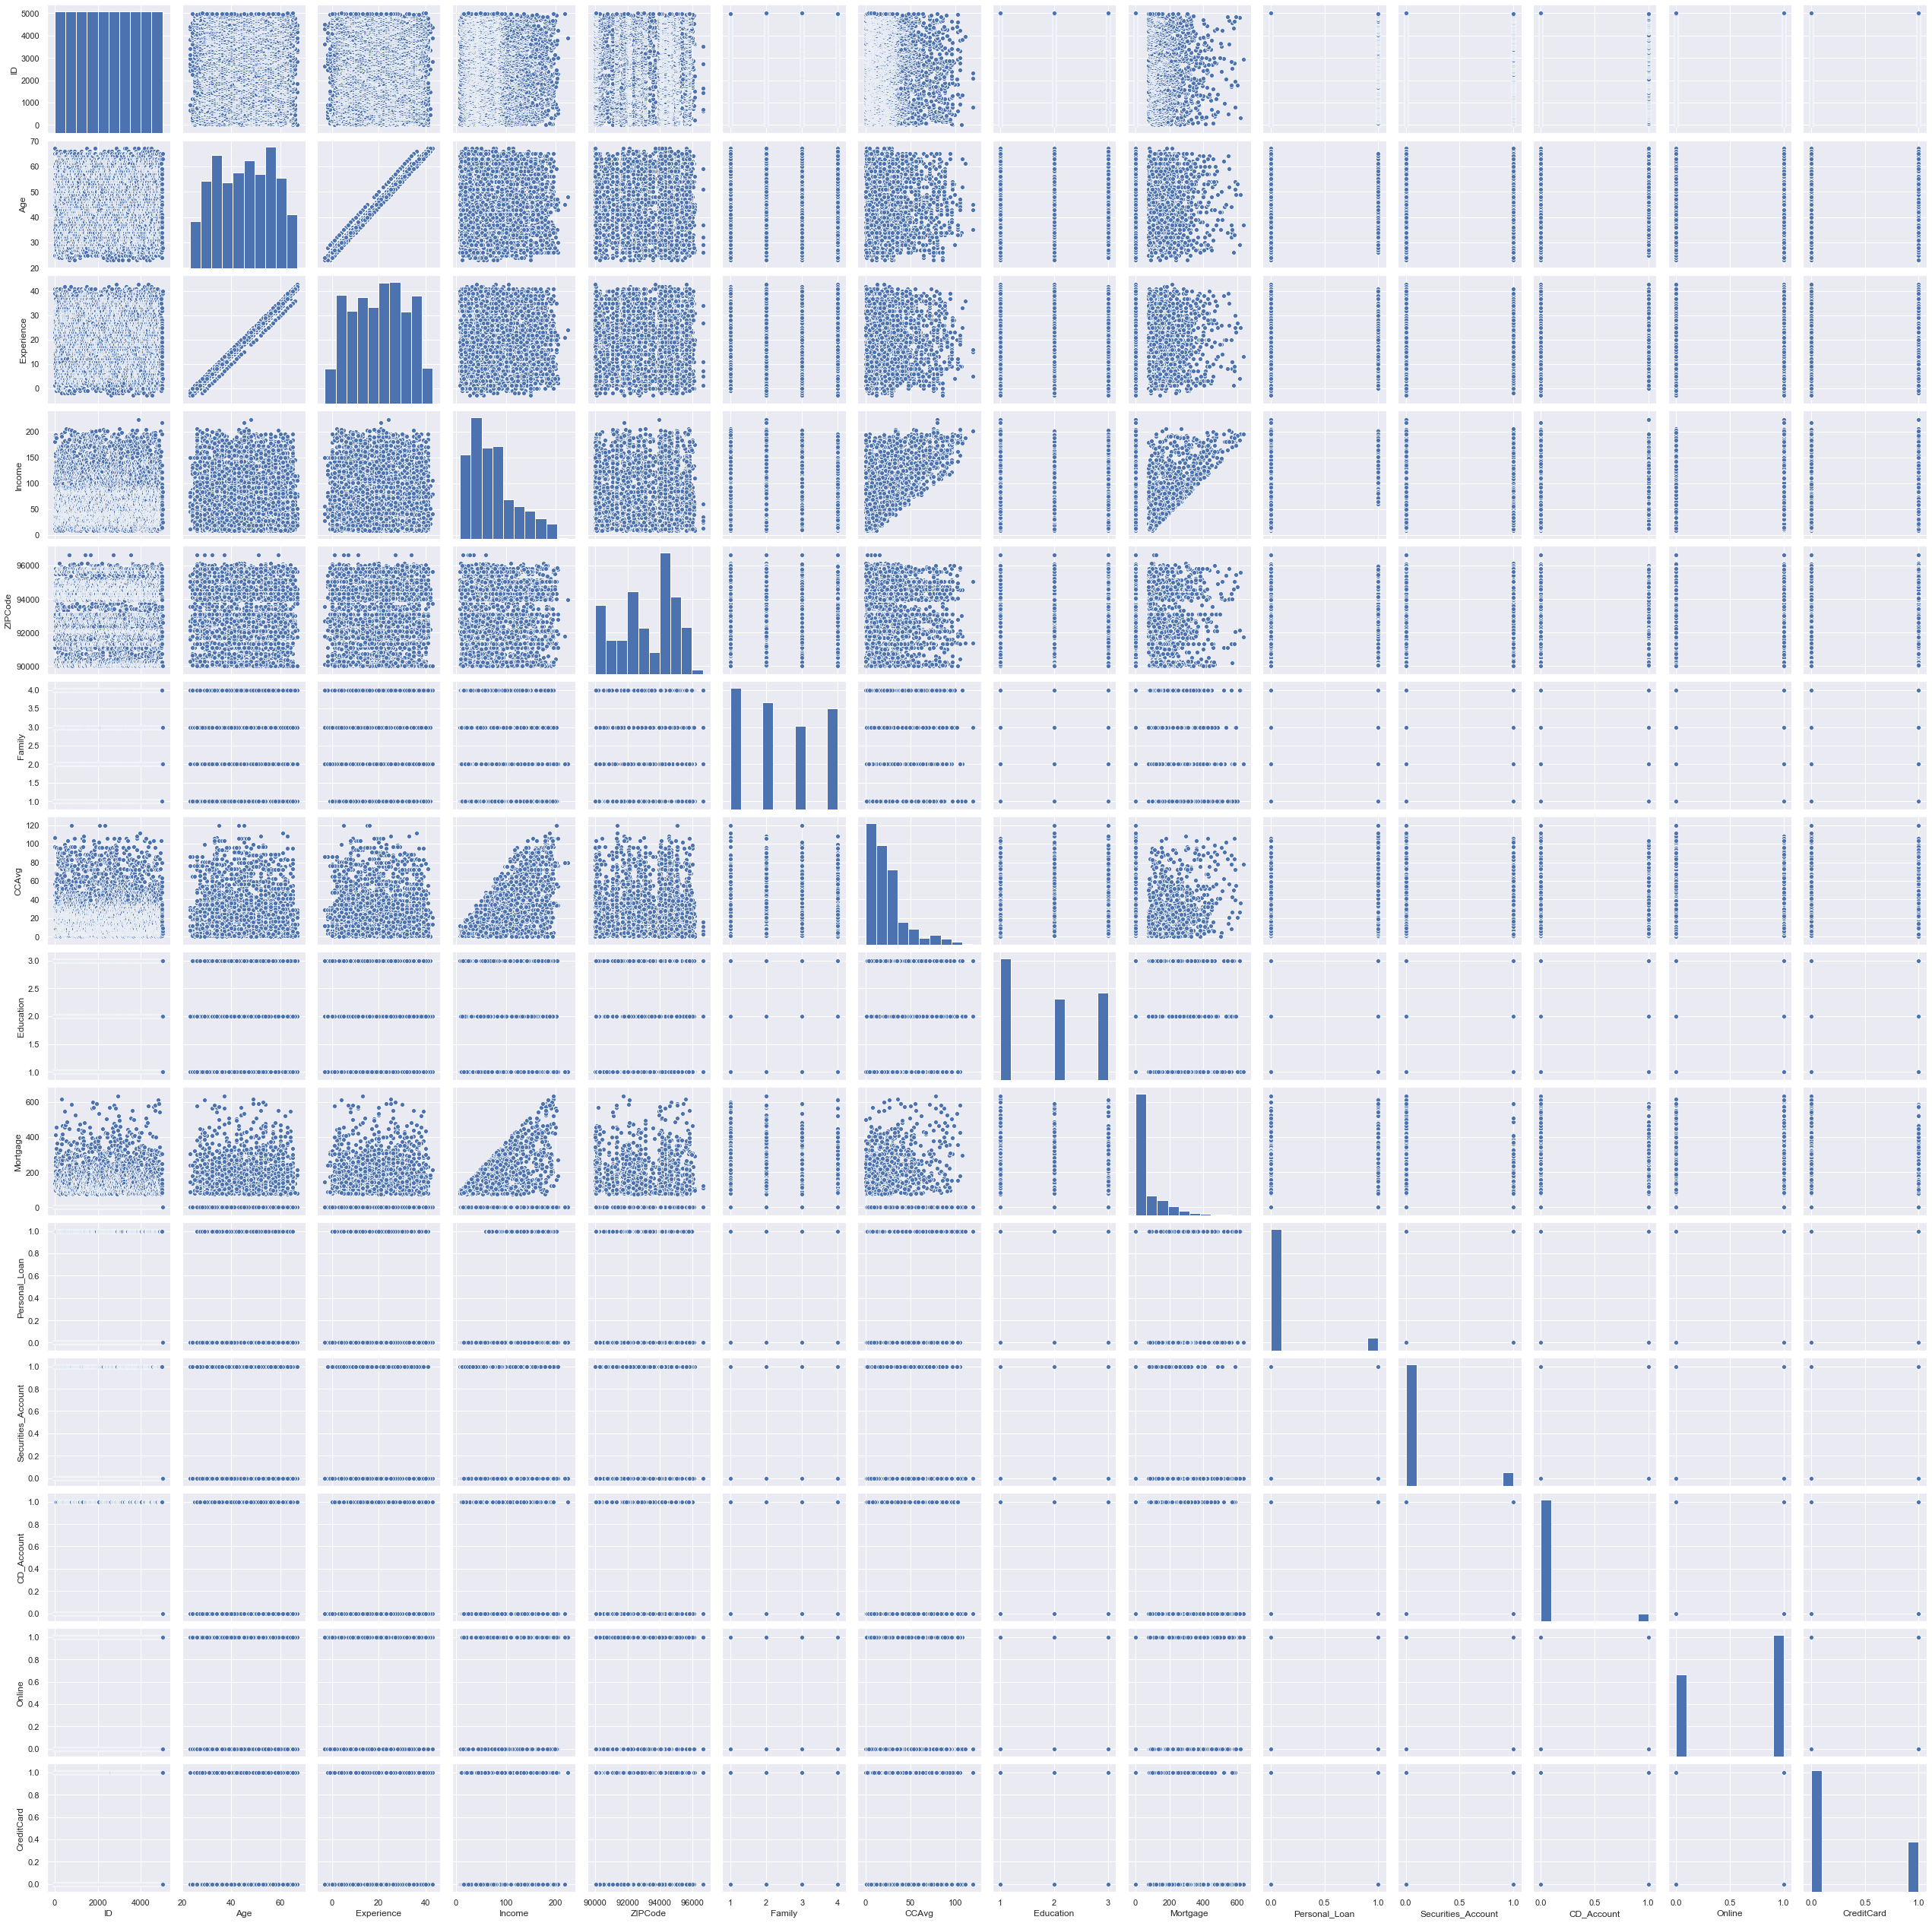

In [190]:
sns.pairplot(Loan_df)
plt.show()

***Observations***
- Age and Experience are positively corelated. As Age increases Experience also increases.
- As income increases, customer is spending more money on house mortgage. They are positively correlated.
- As income increases. customer is spending more on credit cards. They are positively correlated.

There are overlaps, We see no clear distinction in the distribution of variables for customers who have got the loan or not.
Let's explore this further with the help of other plots.

# 2. Illustrate the insights based on EDA

In [191]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, Loan_df["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, Loan_df["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

### 2.1 Comments on attributes

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

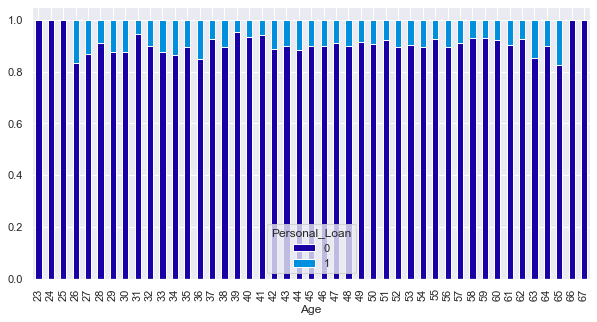

In [192]:
stacked_plot(Loan_df["Age"])

***Comments:***
- This plot shows that customer with age 23,23,25,66,67 has not purchased any Personal loan.
- Range: The age is between 23 and 67 years of customers

Personal_Loan     0    1   All
Experience                    
-3                4    0     4
-2               15    0    15
-1               33    0    33
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27      

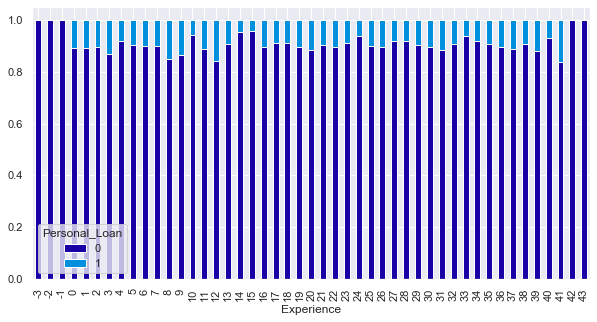

In [193]:
stacked_plot(Loan_df["Experience"])

***Comments:***
- The customer with experience less than zero and experience with 42 & 43 yrs has not purchased any Personal loan.
- The customers with less than zero experiences is not realistic and so need to be treated in data preprocessing.

***Fixes:***
- The customers with less than zero experiences can be replaced with zero experiences or changed to positive experience years

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


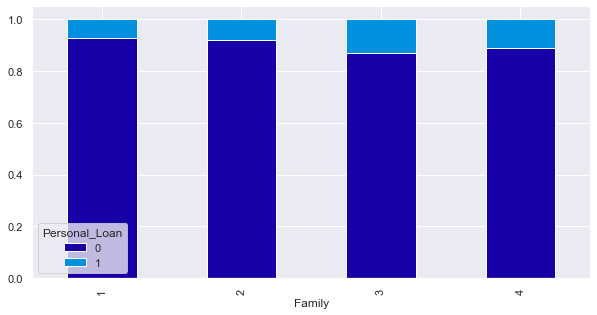

In [194]:
stacked_plot(Loan_df["Family"])

***Comments:***
- The customer with family size of 3 has bought more percentage of Personal loans than others.

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


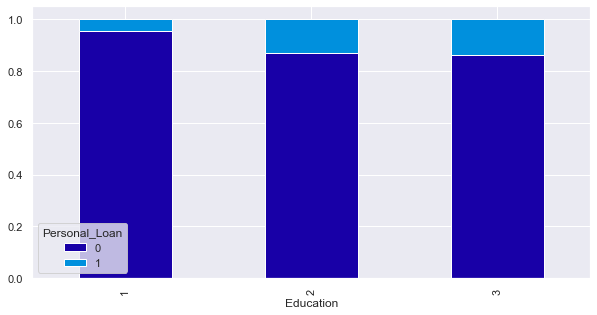

In [195]:
stacked_plot(Loan_df["Education"])

***Comments:***
- The customer with education -Advanced/Professional has got more personal loans than others.

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


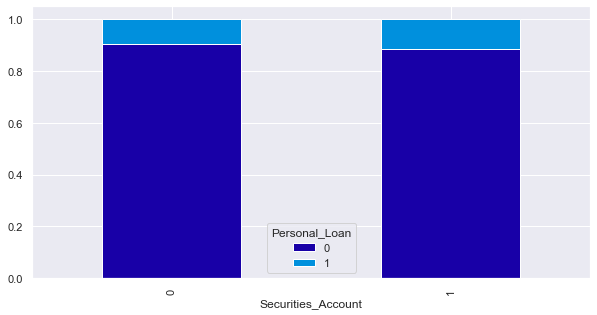

In [196]:
stacked_plot(Loan_df["Securities_Account"])

***Comments:***
- The percentage of customers with Securities Account who got personal loan(i.e 11.5%) is more than percentage of customers with no Securities Account who got personal loan(i.e 9.3%).

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


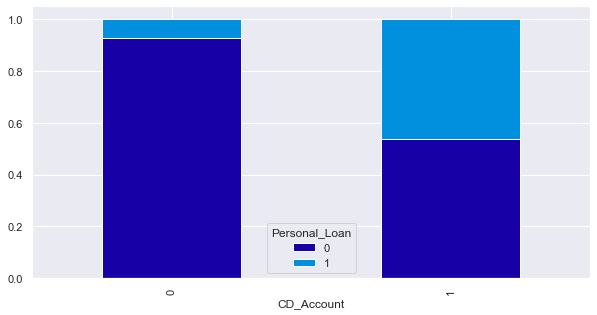

In [197]:
stacked_plot(Loan_df["CD_Account"])

***Comments:***
- The customers with certificate of deposit (CD) account has purchased more Personal loans (in percentage) compared to customers with no certificate of deposit (CD) account.

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


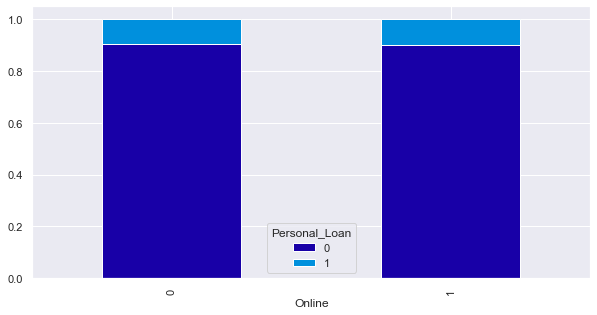

In [198]:
stacked_plot(Loan_df["Online"])

***Comments:***
- The percentage of customers(having internet banking or not) who purchased Personal loans are almost same. i.e having internet banking or not has no influence on purchasing Personal loans.

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


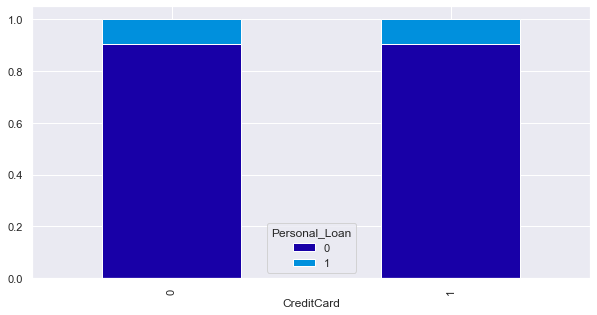

In [199]:
stacked_plot(Loan_df["CreditCard"])

***Observations***
- The percentage of customers(having other bank creditcard or not) who purchased Personal loans are almost same. i.e having other bank creditcard or not has no influence on purchasing Personal loans.

### 2.2 Comments on Plots

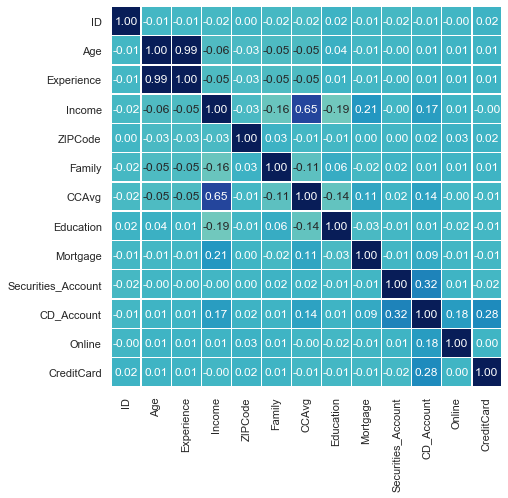

In [200]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    Loan_df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

***Observations***
- Age and Experience are very positively corelated. As Age increases Experience also increases.
- The income and CCAvg is positively correlated. As income increases. customer is spending more on credit cards.
- The CD account and Securities account are very less positively correlated. 
- The CD account and Creditcard are very less positively correlated. 

### 2.3 Outliers in every numerical column

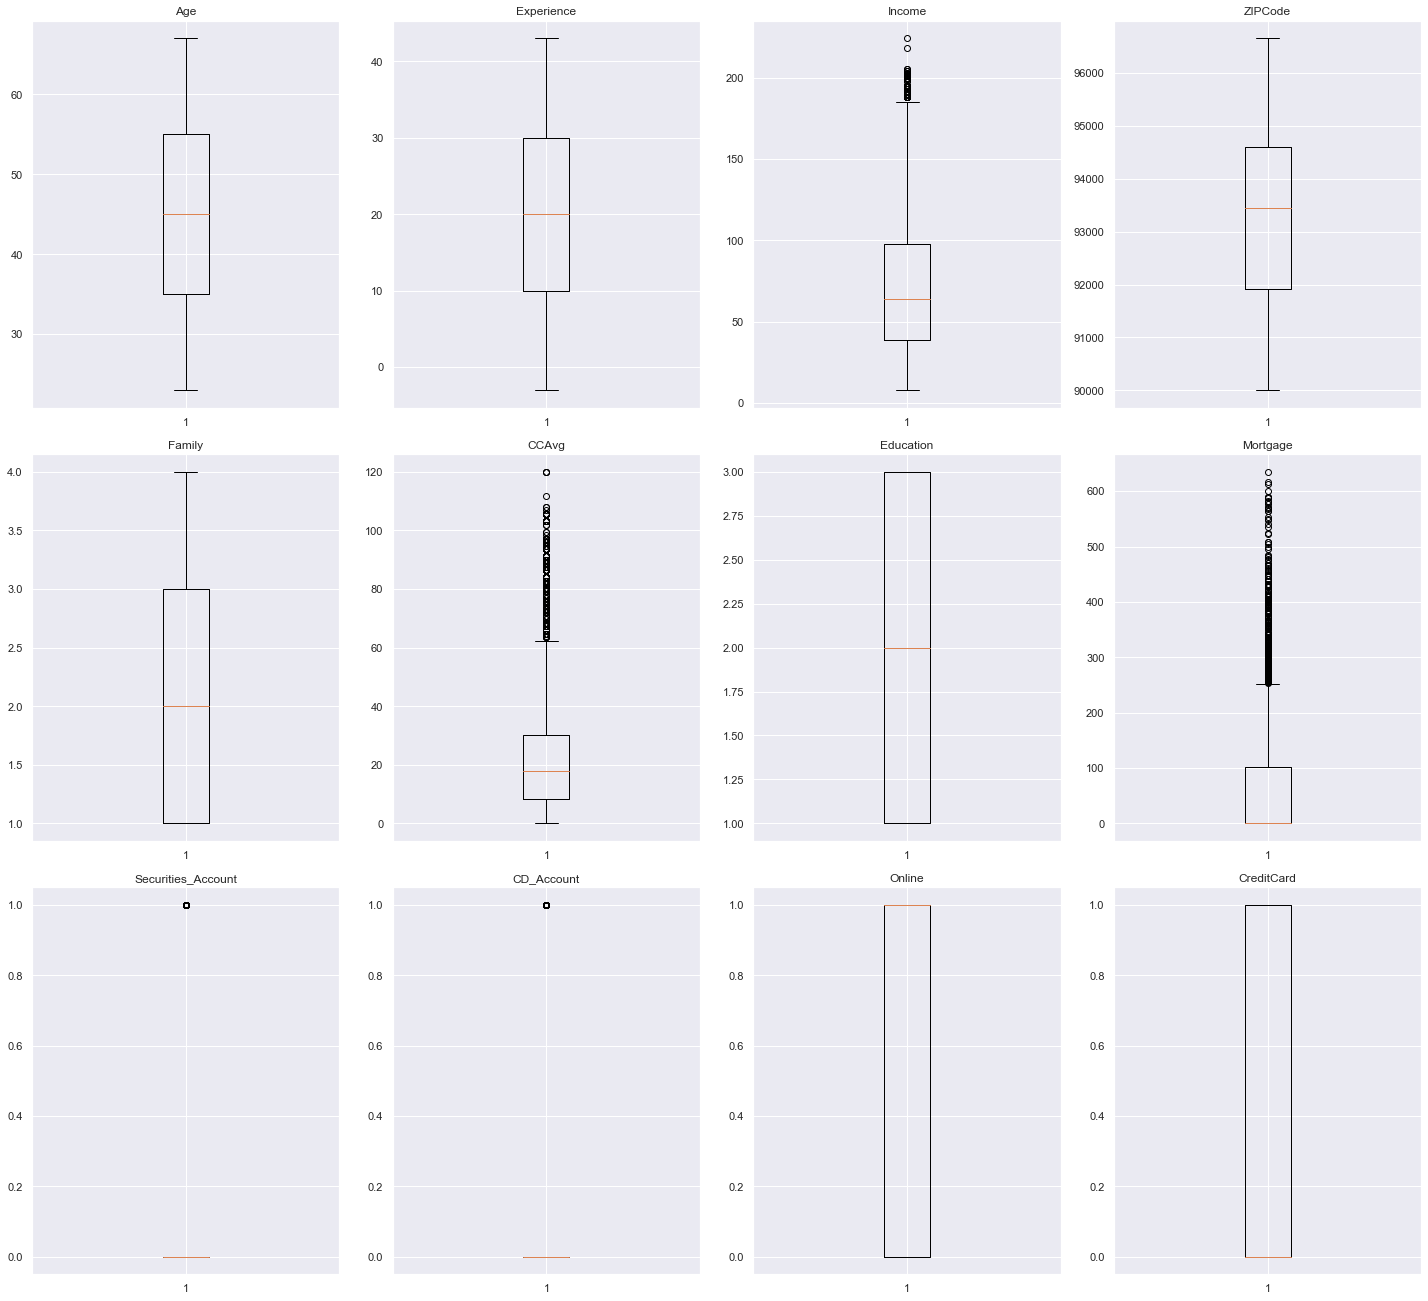

In [201]:
# outlier detection using boxplot
numeric_columns = Loan_df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('ID') # dropping year column as it is temporal variable
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Loan_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***

No Outliers detected in box-plot: 
- Age : There is no outliers for Age feature
- Experience : There is no outliers for Experience feature
- Family :There is no outliers for Family feature
- Education :There is no outliers for Education feature
- Online and Creditcard : There is no outliers for Online and Creditcard feature

Outliers detected in box-plot: 
- Income : There are some outliers detected for Income. But we will no treat them as Outliers
because income cannot be expected to be in any fixed ranges for the customers. So, they are not considered as Outliers.
- CCAvg - Monthly Credit card expenses amounts have some outliers detected.  But we will no treat them as Outliers
because Credit card expenses cannot be expected to be in any fixed ranges for the customers. So, they are not considered as Outliers.
- Mortgage : There are some outliers for Mortgage. Since 69% of customers don't have mortgage, the customers with mortgage is detected as Outliers.    
 But they are not Outliers. So, we will not treat them as Outliers.
- Securities amount and CD_amount : Since customers have only 10.4% of Securities amount and 6% of CD amounts, they are detected as outliers.                       
 But they are not Outliers. So, we will not treat them as Outliers.

# 3. Data pre-processing

### 3.1 Treatment of negative values in Experience column.

In [202]:
loan_Exp_neg_df = Loan_df.loc[Loan_df['Experience'] < 0].sort_values(by= ['Experience'],ascending=False)
loan_Exp_neg_df

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4  27.60          3   
3284  3285   25          -1     101    95819       4  25.20          3   
2430  2431   23          -1      73    92120       4  31.20          1   
2545  2546   25          -1      39    94720       3  28.80          2   
226    227   24          -1      39    94085       2  20.40          2   
2980  2981   25          -1      53    94305       3  28.80          2   
3076  3077   29          -1      62    92672       2  21.00          3   
3157  3158   23          -1      13    94720       4  12.00          1   
3279  3280   26          -1      44    94901       1  24.00          2   
3292  3293   25          -1      13    95616       4   4.80          1   
1905  1906   25          -1     112    92507       2  24.00          1   
3394  3395   25          -1     113    90089       4  25.20          3   
3425  3426   23          -1      12    91605       4  12.00          1   
3824  3825   23          -1      12    95064       4  12.00          1   
3946  3947   25          -1      40    93117       3  28.80          2   
4015  4016   25          -1     139    93106       2  24.00          1   
4088  4089   29          -1      71    94801       2  21.00          3   
4582  4583   25          -1      69    92691       3   3.60          3   
2102  2103   25          -1      81    92647       2  19.20          3   
2848  2849   24          -1      78    94720       2  21.60          2   
1522  1523   25          -1     101    94720       4  27.60          3   
686    687   24          -1      38    92612       4   7.20          2   
524    525   24          -1      75    93014       4   2.40          1   
536    537   25          -1      43    92173       3  28.80          2   
540    541   25          -1     109    94010       4  27.60          3   
576    577   25          -1      48    92870       3   3.60          3   
1428  1429   25          -1      21    94583       4   4.80          1   
649    650   25          -1      82    92677       4  25.20          3   
670    671   23          -1      61    92374       4  31.20          1   
583    584   24          -1      38    95045       2  20.40          2   
4957  4958   29          -1      50    95842       2  21.00          3   
909    910   23          -1     149    91709       1  75.96          1   
1173  1174   24          -1      35    94305       2  20.40          2   
3130  3131   23          -2      82    92152       2  21.60          2   
315    316   24          -2      51    90630       3   3.60          3   
4481  4482   25          -2      35    95045       4  12.00          3   
4411  4412   23          -2      75    90291       2  21.60          2   
4116  4117   24          -2     135    90065       2  86.40          1   
451    452   28          -2      48    94132       2  21.00          3   
2466  2467   24          -2      80    94105       2  19.20          3   
793    794   24          -2     150    94720       2  24.00          1   
3796  3797   24          -2      50    94920       3  28.80          2   
2717  2718   23          -2      45    95422       4   7.20          2   
597    598   24          -2     125    92835       2  86.40          1   
2876  2877   24          -2      80    91107       2  19.20          3   
2962  2963   23          -2      81    91711       2  21.60          2   
889    890   24          -2      82    91103       2  19.20          3   
3887  3888   24          -2     118    92634       2  86.40          1   
2618  2619   23          -3      55    92704       3  28.80          2   
3626  3627   24          -3      28    90089       4  12.00          3   
4285  4286   23          -3     149    93555       2  86.40          1   
4514  4515   24          -3      41    91768       4  12.00          3   

      Mortgage Personal_Loan  Securities_Account  CD_Account  Online  \
89           

***Observations***
There are 52 customers whose experience is less than zero. This is 1% of the total dataframe.
- There are 33 customers with experience -1
- There are 15 customers with experience -2
- There are 4 customers with experience -3

All the 52 customers didn't have any personal loans and no CD accounts. 
- Customers with experience -1 have minimum income of 12 thousand dollars and maximum of 149 thousand dollars with Education as Undergraduate. 
- Customer with experience -2 have minimum income of 35 thousand dollars(Advanced/Professional) and maximum of 150 thousand dollars(undergraduate) 
- Customer with experience -3 have minimum income of 28 thousand dollars(Advanced/Professional) and maximum of 149 thousand dollars(undergraduate) 

From above data, We see some discrepancies in the experience Vs income Vs education. The person with Advanced/Professional gets less income than undergraduate.

Compared correlation in Heat map:
By checking the correlation between experience, income and education. 
experience - education = 0.01
experience - income    = -0.05 
income - education     =-0.19
There is almost zero correlation between the independent variables experience, income and education.

Pre-processing:
There are 2 options to do negative value treatment, 
- To replace all negatives experiences as zero experiences.
- To remove negative signs (considering as type errors) and consider as positive values.  

***Fixes:***
We will remove negative signs and consider as positive experiences. 

In [203]:
#To Replace the negative experience with the positive experience
Loan_df['Experience'].replace({-1:1,-2:2,-3:3 },inplace=True)
Loan_df.sort_values(by= ['Experience'],ascending=True)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2756  2757   27           0      40    91301       4   12.0          3   
2009  2010   25           0      99    92735       1   22.8          1   
4393  4394   24           0      59    95521       4   19.2          1   
347    348   25           0      43    94305       2   19.2          3   
4425  4426   26           0     164    95973       2   48.0          3   
...    ...  ...         ...     ...      ...     ...    ...        ...   
1480  1481   67          42      32    93943       1   13.2          3   
465    466   66          42      35    94305       1   22.8          2   
2846  2847   67          43     105    93711       4   20.4          2   
3886  3887   67          43      79    95616       4   20.4          2   
4360  4361   67          43      41    90024       2   13.2          1   

      Mortgage Personal_Loan  Securities_Account  CD_Account  Online  \
2756         0             0                   0           0       1   
2009       323             0                   0           0       0   
4393         0             0                   0           0       0   
347          0             0                   1           1       1   
4425       301             1                   0           0       1   
...        ...           ...                 ...         ...     ...   
1480         0             0                   0           0       0   
465        172             0                   0           0       1   
2846         0             0                   0           0       1   
3886       215             0                   0           1       1   
4360         0             0                   0           0       0   

      CreditCard  
2756           0  
2009           0  
4393           0  
347            1  
4425           0  
...          ...  
1480           1  
465            0  
2846           0  
3886           1  
4360           0  

[5000 rows x 14 columns]

In [204]:
#To check for any negative experience exists. We should have all positve experience
print(Loan_df.loc[Loan_df['Experience'] < 0])

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []


- The negative Experience values has been treated. 

### 3.2 Preprocessing on ZIP code

The first 3 digits of the zipcodes corresponds to a particular city in US. 

Preprocessing:
- To get the first 3 digits from ZipCode to a new feature as ZIPCity as Categorical values. 
- The ZipCode feature will be dropped.

In [205]:
#To get the first 3 digits in the Zipcode
Loan_df['ZIPCity'] = Loan_df.ZIPCode.astype(str).str[:3]

In [206]:
#To drop the Zip code feature
Loan_df.drop(['ZIPCode'],axis=1,inplace = True)
Loan_df

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0        1   25           1      49       4   19.2          1         0   
1        2   45          19      34       3   18.0          1         0   
2        3   39          15      11       1   12.0          1         0   
3        4   35           9     100       1   32.4          2         0   
4        5   35           8      45       4   12.0          2         0   
...    ...  ...         ...     ...     ...    ...        ...       ...   
4995  4996   29           3      40       1   22.8          3         0   
4996  4997   30           4      15       4    4.8          1        85   
4997  4998   63          39      24       2    3.6          3         0   
4998  4999   65          40      49       3    6.0          2         0   
4999  5000   28           4      83       3    9.6          1         0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard ZIPCity  
0                0                   1           0       0           0     911  
1                0                   1           0       0           0     900  
2                0                   0           0       0           0     947  
3                0                   0           0       0           0     941  
4                0                   0           0       0           1     913  
...            ...                 ...         ...     ...         ...     ...  
4995             0                   0           0       1           0     926  
4996             0                   0           0       1           0     920  
4997             0                   0           0       0           0     930  
4998             0                   0           0       1           0     900  
4999             0                   0           0       1           1     926  

[5000 rows x 14 columns]

In [207]:
#To check for unique Zip city codes
print(Loan_df.ZIPCity.nunique())

57


There are 57 unique ZIPCity categorical values. We will do get dummies for the categorical ZIPCity.

In [208]:
Loan_df_New = Loan_df.copy()
Loan_df = pd.get_dummies(Loan_df, columns=['ZIPCity'], drop_first=True)
Loan_df.head()

ID  Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49       4   19.2          1         0   
1   2   45          19      34       3   18.0          1         0   
2   3   39          15      11       1   12.0          1         0   
3   4   35           9     100       1   32.4          2         0   
4   5   35           8      45       4   12.0          2         0   

  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0             0                   1           0       0           0   
1             0                   1           0       0           0   
2             0                   0           0       0           0   
3             0                   0           0       0           0   
4             0                   0           0       0           1   

   ZIPCity_902  ZIPCity_903  ZIPCity_904  ZIPCity_905  ZIPCity_906  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_907  ZIPCity_908  ZIPCity_910  ZIPCity_911  ZIPCity_912  \
0            0            0            0            1            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_913  ZIPCity_914  ZIPCity_916  ZIPCity_917  ZIPCity_918  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   ZIPCity_919  ZIPCity_920  ZIPCity_921  ZIPCity_922  ZIPCity_923  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_924  ZIPCity_925  ZIPCity_926  ZIPCity_927  ZIPCity_928  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_930  ZIPCity_931  ZIPCity_933  ZIPCity_934  ZIPCity_935  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_936  ZIPCity_937  ZIPCity_939  ZIPCity_940  ZIPCity_941  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            1   
4            0            0            0            0            0   

   ZIPCity_942  ZIPCity_943  ZIPCity_944  ZIPCity_945  ZIPCity_946  \
0            0            0            0            0            0   
1            0            0            0            0            0  

In [209]:
Loan_df.shape

(5000, 69)

### 3.3 To drop ID Columns

In [210]:
#To drop the Zip code feature
Loan_df.drop(['ID'],axis=1,inplace = True)
Loan_df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4   19.2          1         0   
1      45          19      34       3   18.0          1         0   
2      39          15      11       1   12.0          1         0   
3      35           9     100       1   32.4          2         0   
4      35           8      45       4   12.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1   22.8          3         0   
4996   30           4      15       4    4.8          1        85   
4997   63          39      24       2    3.6          3         0   
4998   65          40      49       3    6.0          2         0   
4999   28           4      83       3    9.6          1         0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0                0                   1           0       0           0   
1                0                   1           0       0           0   
2                0                   0           0       0           0   
3                0                   0           0       0           0   
4                0                   0           0       0           1   
...            ...                 ...         ...     ...         ...   
4995             0                   0           0       1           0   
4996             0                   0           0       1           0   
4997             0                   0           0       0           0   
4998             0                   0           0       1           0   
4999             0                   0           0       1           1   

      ZIPCity_902  ZIPCity_903  ZIPCity_904  ZIPCity_905  ZIPCity_906  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
4995            0            0            0            0            0   
4996            0            0            0            0            0   
4997            0            0            0            0            0   
4998            0            0            0            0            0   
4999            0            0            0            0            0   

      ZIPCity_907  ZIPCity_908  ZIPCity_910  ZIPCity_911  ZIPCity_912  \
0               0            0            0            1            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
4995            0            0            0            0            0   
4996            0            0            0            0            0   
4997            0            0            0            0            0   
4998            0            0            0            0            0   
4999            0            0            0            0            0   

      ZIPCity_913  ZIPCity_914  ZIPCity_916  ZIPCity_917  ZIPCity_918  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               1            0            0            0            0   
...           ...          ...          ...          ...          ...   
4995            0      

### 3.4 Identification of outlier

Based on the Boxplots in EDA, there are Outliers identified for feature - Income, CCAvg, Mortgage, Securities amount and CD_amount

- Income : There are some outliers detected for Income. But we will no treat them as Outliers
because income cannot be expected to be in any fixed ranges for the customers. So, they are not considered as Outliers.
- CCAvg - Monthly Credit card expenses amounts have some outliers detected.  But we will no treat them as Outliers
because Credit card expenses cannot be expected to be in any fixed ranges for the customers. So, they are not considered as Outliers.
- Mortgage : There are some outliers for Mortgage. Since 69% of customers don't have mortgage, the customers with mortgage is detected as Outliers. But they are not Outliers. So, we will not treat them as Outliers.
- Securities amount and CD_amount : Since customers have only 10.4% of Securities amount and 6% of CD amounts, they are detected as outliers. But they are not Outliers. So, we will not treat them as Outliers.

### 3.5 Outliers Treatment

The Outliers identified are Income, CCAvg, Mortgage, Securities amount and CD_amount. But they are not actually an Outliers
so we will not treat Outliers for our model. I've provided the reason for not being an outlier in 3.4 section.

# 4.Model building - Logistic Regression

### 4.1 To Build the Model

In [211]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [212]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [213]:
Loan_df_LR = Loan_df.copy()
X = Loan_df_LR.drop('Personal_Loan',axis=1)
Y = Loan_df_LR['Personal_Loan']

# creating dummy variables
X = pd.get_dummies(X,drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

### 4.2 Check for multicollinearity (using Variance inflation factors)

In [214]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [215]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) 
for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 447.882989
Age                    90.262992
Experience             90.190698
Income                  1.880760
Family                  1.045269
CCAvg                   1.744391
Education               1.118836
Mortgage                1.062853
Securities_Account      1.149736
CD_Account              1.344234
Online                  1.057170
CreditCard              1.118735
ZIPCity_902             1.387416
ZIPCity_903             1.006481
ZIPCity_904             1.086762
ZIPCity_905             1.070457
ZIPCity_906             1.097296
ZIPCity_907             1.111580
ZIPCity_908             1.049751
ZIPCity_910             1.072690
ZIPCity_911             1.175761
ZIPCity_912             1.020438
ZIPCity_913             1.523345
ZIPCity_914             1.034141
ZIPCity_916             1.072699
ZIPCity_917             1.360284
ZIPCity_918             1.010119
ZIPCity_919             1.103597
ZIPCity_920             1.582498
ZIPCity_

***Observations:***

The Age and experience feature VIF value exceeds 10 i.e They have a high multicollinearity.
So we need to perform iterative procedure to drop multi-collinear variables and check the performance.
Repeat the iterative procedure until there is no multicollinearity.


In [216]:
X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

In [217]:
# The Age feature having a hight VIF value is dropped.
X_train1 = X_train1.drop('Age', axis=1)
X_test1  = X_test1.drop('Age', axis=1)

### 4.3 Removed multicollinearity and made logistic regression model. 

In [218]:
vif_series2 = pd.Series([variance_inflation_factor(X_train1.values,i) 
for i in range(X_train1.shape[1])],index=X_train1.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Experience             1.019667
Income                 1.894419
Family                 1.054384
CCAvg                  1.742842
Education              1.062034
Mortgage               1.077039
Securities_Account     1.159289
CD_Account             1.345721
Online                 1.061396
CreditCard             1.125319
ZIPCity_902            1.381732
ZIPCity_903            1.009110
ZIPCity_904            1.099393
ZIPCity_905            1.061905
ZIPCity_906            1.085012
ZIPCity_907            1.126184
ZIPCity_908            1.038922
ZIPCity_910            1.075853
ZIPCity_911            1.152586
ZIPCity_912            1.015501
ZIPCity_913            1.479115
ZIPCity_914            1.034166
ZIPCity_916            1.065419
ZIPCity_917            1.319854
ZIPCity_918            1.009239
ZIPCity_919            1.111025
ZIPCity_920            1.515608
ZIPCity_921            1.620598
ZIPCity_922            1.024488
ZIPCity_923            1.156388
ZIPCi

* The VIF for all the features are almost equal to 1
* There's no multicollinearity present, we can rely on the model use it to make interpretations.

In [219]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train1,y_train)

### 4.4 Checking model performance

Accuracy on training set :  0.9525714285714286
Accuracy on test set :  0.9526666666666667
Recall on training set :  0.6068111455108359
Recall on test set :  0.6369426751592356
Precision on training set :  0.8340425531914893
Precision on test set :  0.8771929824561403


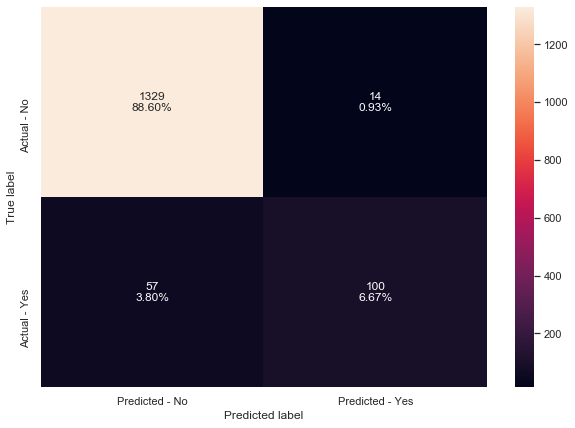

In [220]:
scores_LR = get_metrics_score(lg,X_train1,X_test1,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(lg,X_test1,y_test)

* True Positives (TP): we correctly predicted that customers will not purchase personal loans(1329)
* True Negatives (TN): we correctly predicted that customers will purchase personal loans(100)
* False Positives (FP): we incorrectly predicted that customers will purchase personal loans (a "Type I error") 14 Falsely predict positive Type I error
* False Negatives (FN): we incorrectly predicted that customers will not purchase personal loans (a "Type II error") 57 Falsely predict negative Type II error

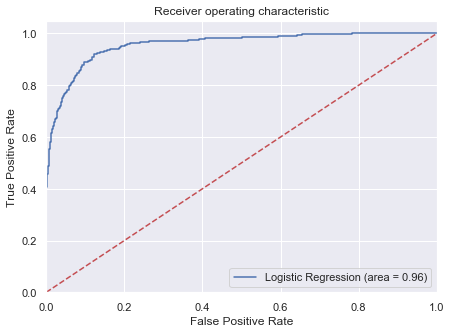

In [221]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train1)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train1)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Model has given a generalized performance on training and test set.
* Recall is less and we should try to improve it.
* Let's change the threshold to see if the model performance can be improved.

### 4.5 Coefficients and Odds.

### Finding the coefficients

In [222]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train1.columns, columns=['coef']).T

Experience    Income    Family     CCAvg  Education  Mortgage  \
coef    0.006449  0.047122  0.583406  0.008567   1.355133  0.000568   

      Securities_Account  CD_Account    Online  CreditCard  ZIPCity_902  \
coef           -0.361755     3.34817 -0.586451   -1.055087    -0.175629   

      ZIPCity_903  ZIPCity_904  ZIPCity_905  ZIPCity_906  ZIPCity_907  \
coef    -0.004857     0.022799     -0.06996     0.077232    -0.174545   

      ZIPCity_908  ZIPCity_910  ZIPCity_911  ZIPCity_912  ZIPCity_913  \
coef     -0.00881    -0.068885     0.002431     0.054134    -0.102068   

      ZIPCity_914  ZIPCity_916  ZIPCity_917  ZIPCity_918  ZIPCity_919  \
coef    -0.024898    -0.031603    -0.223097    -0.052622    -0.074987   

      ZIPCity_920  ZIPCity_921  ZIPCity_922  ZIPCity_923  ZIPCity_924  \
coef     0.095972    -0.527311     0.015914    -0.277492    -0.007591   

      ZIPCity_925  ZIPCity_926  ZIPCity_927  ZIPCity_928  ZIPCity_930  \
coef      0.03154    -0.002949    -0.256157    -0.212502     0.197874   

      ZIPCity_931  ZIPCity_933  ZIPCity_934  ZIPCity_935  ZIPCity_936  \
coef    -0.312047     0.076237    -0.032218     -0.01831    -0.063129   

      ZIPCity_937  ZIPCity_939  ZIPCity_940  ZIPCity_941  ZIPCity_942  \
coef     -0.01187     -0.06539    -0.459397    -0.245397     0.010635   

      ZIPCity_943  ZIPCity_944  ZIPCity_945  ZIPCity_946  ZIPCity_947  \
coef    -0.349549     -0.06514     -0.37615    -0.259313     0.003931   

      ZIPCity_948  ZIPCity_949  ZIPCity_950  ZIPCity_951  ZIPCity_952  \
coef     0.064382     0.106905    -0.195285    -0.203363     0.021277   

      ZIPCity_953  ZIPCity_954  ZIPCity_955  ZIPCity_956  ZIPCity_957  \
coef    -0.108235    -0.062829    -0.124834    -0.260975    -0.101312   

      ZIPCity_958  ZIPCity_959  ZIPCity_960  ZIPCity_961  ZIPCity_966  \
coef    -0.244471    -0.004135     0.018248    -0.027642    -0.019047   

      constant  
coef -5.573527

### Coefficient interpretations

* Coefficient of Experience, Income, Family, CCAvg, Education, Mortgage, CD_Account and some ZipCity are positive, increase in these will lead to increase in chances of a customer purchasing a Personal loan.
* Coefficient of rest of the columns is negative, increase in these will lead to decrease in chances of a customer not purchasing a Personal loan.

###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [223]:
odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train1.columns, columns=['odds']).T

Experience    Income     Family     CCAvg   Education  Mortgage  \
odds    0.646995  4.824988  79.213195  0.860378  287.727667  0.056814   

      Securities_Account   CD_Account     Online  CreditCard  ZIPCity_902  \
odds           43.584684  2745.062006  79.759743  187.222499     19.19961   

      ZIPCity_903  ZIPCity_904  ZIPCity_905  ZIPCity_906  ZIPCity_907  \
odds      0.48692     2.306114     7.246579     8.029316    19.070464   

      ZIPCity_908  ZIPCity_910  ZIPCity_911  ZIPCity_912  ZIPCity_913  \
odds     0.884856     7.131268     0.243375     5.562595    10.745846   

      ZIPCity_914  ZIPCity_916  ZIPCity_917  ZIPCity_918  ZIPCity_919  \
odds     2.521077     3.210785    24.994234     5.403103     7.787008   

      ZIPCity_920  ZIPCity_921  ZIPCity_922  ZIPCity_923  ZIPCity_924  \
odds     10.07282    69.437029     1.604127    31.981499     0.761989   

      ZIPCity_925  ZIPCity_926  ZIPCity_927  ZIPCity_928  ZIPCity_930  \
odds      3.20426     0.295316    29.195516     23.67684    21.880852   

      ZIPCity_931  ZIPCity_933  ZIPCity_934  ZIPCity_935  ZIPCity_936  \
odds    36.621949     7.921878     3.274249      1.84789     6.516416   

      ZIPCity_937  ZIPCity_939  ZIPCity_940  ZIPCity_941  ZIPCity_942  \
odds     1.194065     6.757548    58.311874    27.812892      1.06916   

      ZIPCity_943  ZIPCity_944  ZIPCity_945  ZIPCity_946  ZIPCity_947  \
odds    41.842827     6.730848    45.666534    29.603903     0.393898   

      ZIPCity_948  ZIPCity_949  ZIPCity_950  ZIPCity_951  ZIPCity_952  \
odds     6.649931    11.282836    21.565791    22.551675     2.150488   

      ZIPCity_953  ZIPCity_954  ZIPCity_955  ZIPCity_956  ZIPCity_957  \
odds    11.430975     6.484488    13.296064    29.819461    10.662134   

      ZIPCity_958  ZIPCity_959  ZIPCity_960  ZIPCity_961  ZIPCity_966  \
odds      27.6946     0.414361     1.841594     2.802807     1.923002   

          constant  
odds  26236.143496

### Coefficient interpretations

- Experience: 1 unit change in Experience will change the odds of a person having Personal loan by 0.6%
- Income : 1 unit change in Income will change the odds of a person having Personal loan by 4.8%
- Family : 1 unit change in Family will change the odds of a person having Personal loan by 79%
- CCAvg : 1 unit change in CCAvg will change the odds of a person having Personal loan by 0.86%
- Mortgage : 1 unit change in Mortgage will change the odds of a person having Personal loan by 0.05%
- Securities_Account : 1 unit change in Securities_Account will change the odds of a person having Personal loan by 43%

# 5.Model Performance evaluation and improvement

* To check f1 score score can be improved further, by changing the model threshold using AUC-ROC Curve.

### 5.1 Finding optimal threshold

In [224]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test1)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.25809965806714


In [225]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train1)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test1)>optimal_threshold).astype(int)

In [226]:
#Model performance with optimal threhold

print('Accuracy on train data   :',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data    :',accuracy_score(y_test, pred_test_opt))

print('Recall on train data     :',recall_score(y_train, pred_train_opt))
print('Recall on test data      :',recall_score(y_test, pred_test_opt))

print('Precision on train data  :',precision_score(y_train, pred_train_opt) )
print('Precision on test data   :',precision_score(y_test, pred_test_opt))

Accuracy on train data   : 0.9525714285714286
Accuracy on test data    : 0.9526666666666667
Recall on train data     : 0.6068111455108359
Recall on test data      : 0.6369426751592356
Precision on train data  : 0.8340425531914893
Precision on test data   : 0.8771929824561403


* No change in the model performance.

### 5.2 roc_auc method - Precision-Recall curve and see if we can find a better threshold

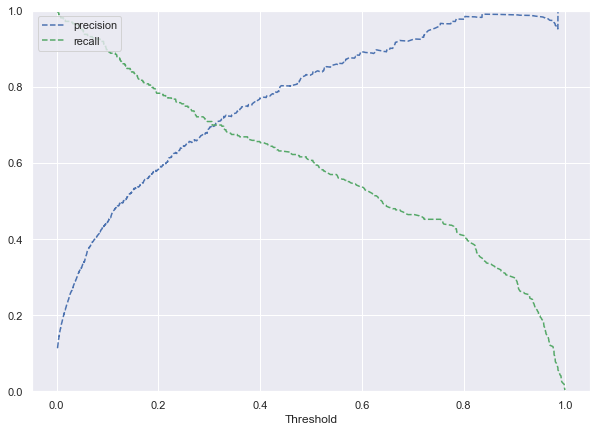

In [227]:
y_scores=lg.predict_proba(X_train1)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

***Comments:***
* At threshold around 0.31 we will get equal precision and recall.
* We would like to increase the Recall, so we will reduce the threshold to get higher Recall.
* We will selecting value around 0.25 will provide a higher recall and a good precision.

### 5.3 Model performance with new threshold

In [228]:
optimal_threshold = 0.25

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train1)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test1)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data     :',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data      :',accuracy_score(y_test, pred_test_opt))

print('Recall on train data       :',recall_score(y_train, pred_train_opt))
print('Recall on test data        :',recall_score(y_test, pred_test_opt))

print('Precision on train data    :',precision_score(y_train, pred_train_opt) )
print('Precision on test data     :',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data :',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data     : 0.9388571428571428
Accuracy on test data      : 0.942
Recall on train data       : 0.7523219814241486
Recall on test data        : 0.8407643312101911
Precision on train data    : 0.6445623342175066
Precision on test data     : 0.6804123711340206
ROC-AUC Score on train data: 0.8550719129657728
ROC-AUC Score on test data : 0.8972995148232639


***Comments:***
* Model is giving a generalized performance on training and test set.
* Recall has improved significantly. The Precision has reduced.
* Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set. 

## Conclusion and Recommendations

- The best test recall in 84% and the test precision is 68%. The model performance can be improved, in terms of precision and recall and the bank use the model for new customers once desired level of model performance is achieved.
- The customer with family size of 3 are more likely to get Personal loans than others.
- The customers with certificate of deposit (CD) account are more likely to get Personal loans than others.


# 6.Model building - Decision Tree

### 6.1 Build the Model

In [229]:
Loan_df_DT = Loan_df.copy()
x = Loan_df_DT.drop(["Personal_Loan"], axis=1)
y = Loan_df_DT["Personal_Loan"]

In [230]:
# encoding the categorical variables
x = pd.get_dummies(x, drop_first=True)
x.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4   19.2          1         0   
1   45          19      34       3   18.0          1         0   
2   39          15      11       1   12.0          1         0   
3   35           9     100       1   32.4          2         0   
4   35           8      45       4   12.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  ZIPCity_902  \
0                   1           0       0           0            0   
1                   1           0       0           0            0   
2                   0           0       0           0            0   
3                   0           0       0           0            0   
4                   0           0       0           1            0   

   ZIPCity_903  ZIPCity_904  ZIPCity_905  ZIPCity_906  ZIPCity_907  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_908  ZIPCity_910  ZIPCity_911  ZIPCity_912  ZIPCity_913  \
0            0            0            1            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            1   

   ZIPCity_914  ZIPCity_916  ZIPCity_917  ZIPCity_918  ZIPCity_919  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_920  ZIPCity_921  ZIPCity_922  ZIPCity_923  ZIPCity_924  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_925  ZIPCity_926  ZIPCity_927  ZIPCity_928  ZIPCity_930  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_931  ZIPCity_933  ZIPCity_934  ZIPCity_935  ZIPCity_936  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   ZIPCity_937  ZIPCity_939  ZIPCity_940  ZIPCity_941  ZIPCity_942  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   ZIPCity_943  ZIPCity_944  ZIPCity_945  ZIPCity_946  ZIPCity_947  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0 

In [231]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4 , random_state=1)

In [232]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3000, 67)
(2000, 67)
(3000,)
(2000,)


### Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [233]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [234]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Scoring our Decision Tree

In [235]:
# accuracy on training set
print("Accuracy on train set", model.score(xtrain,ytrain))

# accuracy on test set
print("Accuracy on test set", model.score(xtest,ytest))

Accuracy on train set 1.0
Accuracy on test set 0.975


Since we don't want incorrectly predict that customers will not purchase personal loans so we should use Recall as a metric of model evaluation instead of accuracy.

Recall - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

In [236]:
## Function to create confusion matrix
def make_confusion_matrix_DT(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

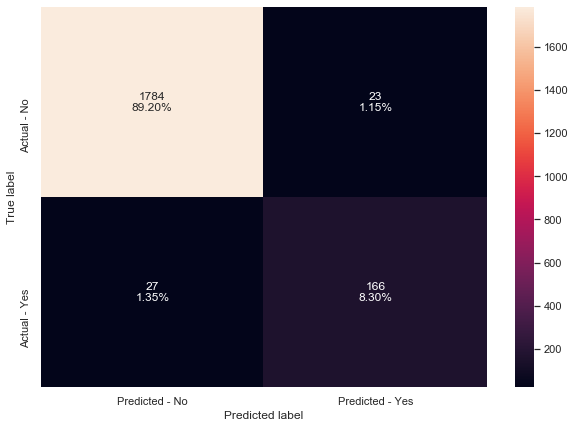

In [237]:
make_confusion_matrix_DT(model,ytest)

In [238]:
##  Function to calculate recall score
def get_recall_score_DT(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    print("Recall on training set : ",metrics.recall_score(ytrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ytest,pred_test))

In [239]:
get_recall_score_DT(model)

Recall on training set :  1.0
Recall on test set :  0.8601036269430051


***Comments:***
* Recall on training and test set is very good.

### 6.2 Visualizing the Decision Tree

In [240]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCity_902', 'ZIPCity_903', 'ZIPCity_904', 'ZIPCity_905', 'ZIPCity_906', 'ZIPCity_907', 'ZIPCity_908', 'ZIPCity_910', 'ZIPCity_911', 'ZIPCity_912', 'ZIPCity_913', 'ZIPCity_914', 'ZIPCity_916', 'ZIPCity_917', 'ZIPCity_918', 'ZIPCity_919', 'ZIPCity_920', 'ZIPCity_921', 'ZIPCity_922', 'ZIPCity_923', 'ZIPCity_924', 'ZIPCity_925', 'ZIPCity_926', 'ZIPCity_927', 'ZIPCity_928', 'ZIPCity_930', 'ZIPCity_931', 'ZIPCity_933', 'ZIPCity_934', 'ZIPCity_935', 'ZIPCity_936', 'ZIPCity_937', 'ZIPCity_939', 'ZIPCity_940', 'ZIPCity_941', 'ZIPCity_942', 'ZIPCity_943', 'ZIPCity_944', 'ZIPCity_945', 'ZIPCity_946', 'ZIPCity_947', 'ZIPCity_948', 'ZIPCity_949', 'ZIPCity_950', 'ZIPCity_951', 'ZIPCity_952', 'ZIPCity_953', 'ZIPCity_954', 'ZIPCity_955', 'ZIPCity_956', 'ZIPCity_957', 'ZIPCity_958', 'ZIPCity_959', 'ZIPCity_960', 'ZIPCity_961', 'ZIPCity_966']


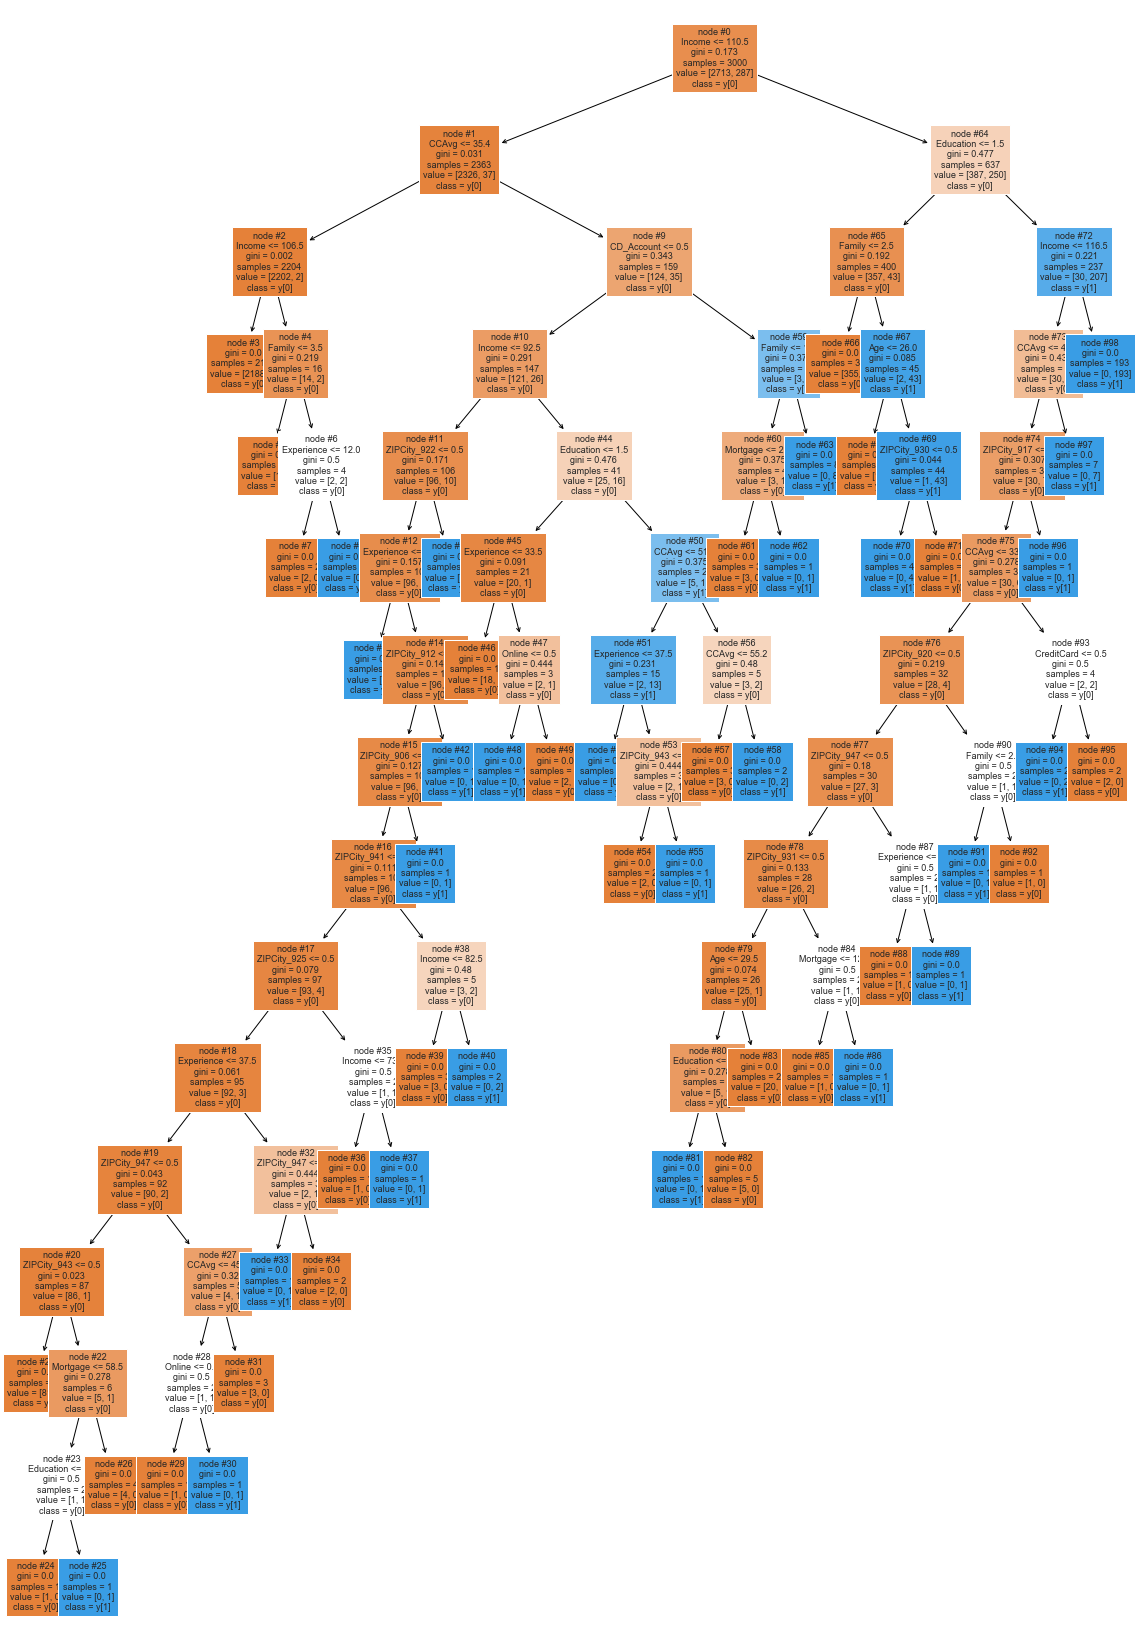

In [241]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [242]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 35.40
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 12.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Experience >  12.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  35.40
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- ZIPCity_922 <= 0.50
|   |   |   |   |   |--- Experience <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Experience >  0.50
|   |   |   |   |   |   |--- ZIPCity_912 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCity_906 <= 0.50
|   |   |   |   |   |   |   |   |--- ZIPCity_941 <= 0.50
|   |   |   |   |   |   |   |   |   |--- ZIPCity_925 <= 0.50
|   |   |   |   |   |   |   |   | 

In [243]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.360983
Income              0.356137
Family              0.151097
CCAvg               0.053222
Experience          0.015328
CD_Account          0.014041
Mortgage            0.006100
ZIPCity_947         0.004537
Online              0.004495
Age                 0.004092
CreditCard          0.003853
ZIPCity_930         0.003765
ZIPCity_906         0.003380
ZIPCity_912         0.003315
ZIPCity_922         0.003190
ZIPCity_943         0.003166
ZIPCity_917         0.002603
ZIPCity_941         0.002358
ZIPCity_925         0.001656
ZIPCity_931         0.001524
ZIPCity_920         0.001156
ZIPCity_942         0.000000
ZIPCity_944         0.000000
ZIPCity_940         0.000000
ZIPCity_945         0.000000
ZIPCity_946         0.000000
ZIPCity_952         0.000000
ZIPCity_948         0.000000
ZIPCity_949         0.000000
ZIPCity_950         0.000000
ZIPCity_951         0.000000
ZIPCity_937         0.000000
ZIPCity_953         0.000000
ZIPCity_954   

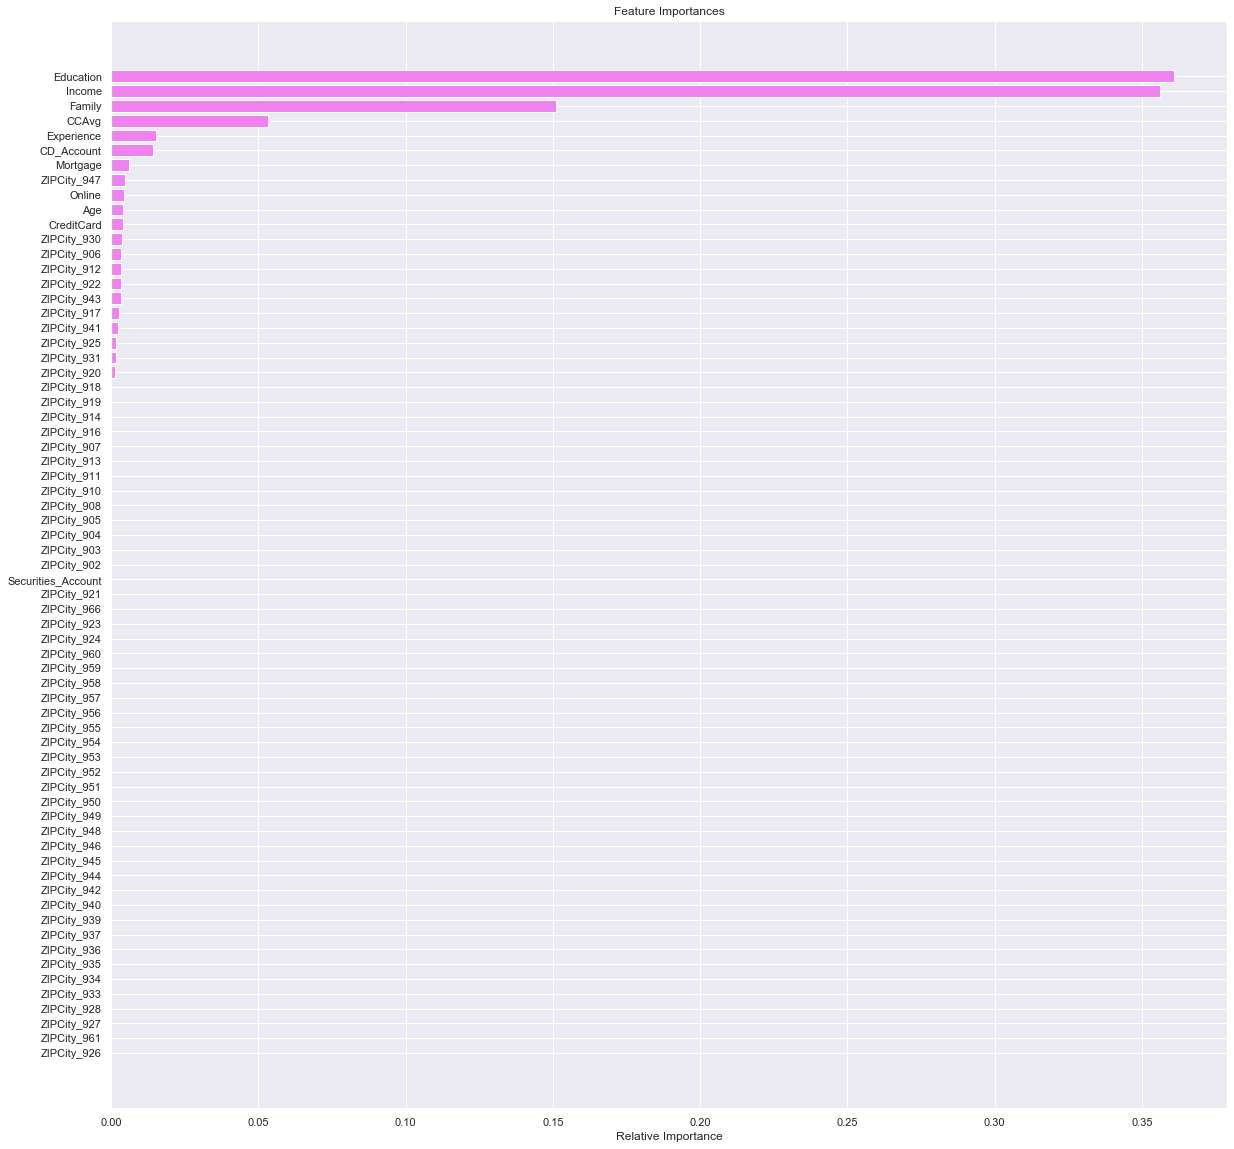

In [244]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

***Comments:***
* Education, income and family are the top 3 important features.
* The tree above is very complex, such a tree often overfits.

# 7. Model Performance evaluation and improvement

### 7.1 Pre-Pruning: Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [245]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xtrain, ytrain)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

- Decision tree with depth restricted to 5

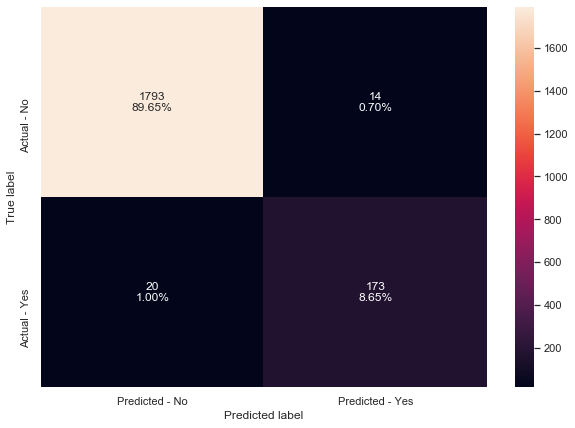

In [246]:
make_confusion_matrix_DT(estimator,ytest)

In [247]:
get_recall_score_DT(estimator)

Recall on training set :  0.9372822299651568
Recall on test set :  0.8963730569948186


***Comments:***
* Recall on training set has reduced from 1 to 0.93 but this is an improvement because now the model is not overfitting and we have a generalized model.

In [248]:
column_names = list(x.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCity_902', 'ZIPCity_903', 'ZIPCity_904', 'ZIPCity_905', 'ZIPCity_906', 'ZIPCity_907', 'ZIPCity_908', 'ZIPCity_910', 'ZIPCity_911', 'ZIPCity_912', 'ZIPCity_913', 'ZIPCity_914', 'ZIPCity_916', 'ZIPCity_917', 'ZIPCity_918', 'ZIPCity_919', 'ZIPCity_920', 'ZIPCity_921', 'ZIPCity_922', 'ZIPCity_923', 'ZIPCity_924', 'ZIPCity_925', 'ZIPCity_926', 'ZIPCity_927', 'ZIPCity_928', 'ZIPCity_930', 'ZIPCity_931', 'ZIPCity_933', 'ZIPCity_934', 'ZIPCity_935', 'ZIPCity_936', 'ZIPCity_937', 'ZIPCity_939', 'ZIPCity_940', 'ZIPCity_941', 'ZIPCity_942', 'ZIPCity_943', 'ZIPCity_944', 'ZIPCity_945', 'ZIPCity_946', 'ZIPCity_947', 'ZIPCity_948', 'ZIPCity_949', 'ZIPCity_950', 'ZIPCity_951', 'ZIPCity_952', 'ZIPCity_953', 'ZIPCity_954', 'ZIPCity_955', 'ZIPCity_956', 'ZIPCity_957', 'ZIPCity_958', 'ZIPCity_959', 'ZIPCity_960', 'ZIPCity_961', 'ZIPCity_966']


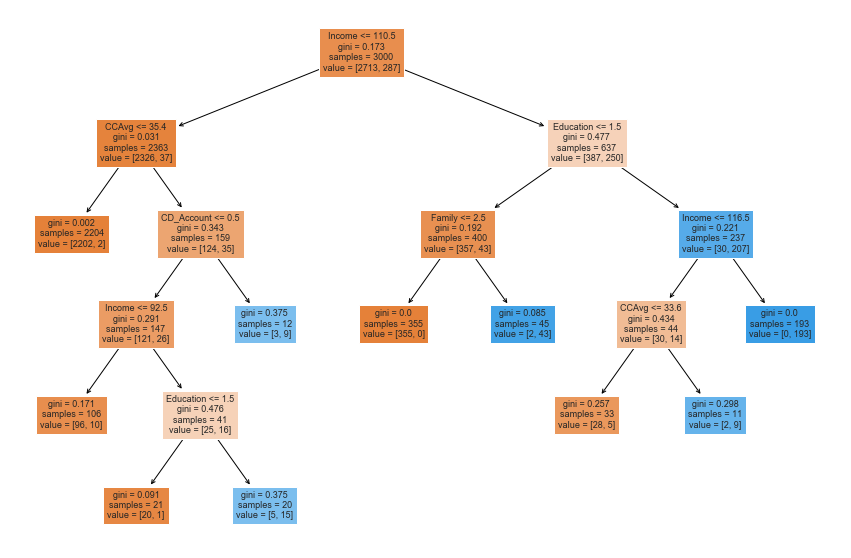

In [249]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [250]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 35.40
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  35.40
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 43.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 33.60
|   |   |   |   |--- weights: [28.00, 5.00] class: 0
|   |   |   |--- CCAvg >  33.60
|   |   |   |   |--- weights: [2.00, 9.00] class: 1
|   |   |--- Income >  116.50

In [251]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Education           0.395118
Income              0.387107
Family              0.156008
CCAvg               0.046176
CD_Account          0.015591
Age                 0.000000
ZIPCity_940         0.000000
ZIPCity_945         0.000000
ZIPCity_944         0.000000
ZIPCity_943         0.000000
ZIPCity_942         0.000000
ZIPCity_941         0.000000
ZIPCity_936         0.000000
ZIPCity_939         0.000000
ZIPCity_937         0.000000
ZIPCity_947         0.000000
ZIPCity_935         0.000000
ZIPCity_934         0.000000
ZIPCity_933         0.000000
ZIPCity_946         0.000000
ZIPCity_950         0.000000
ZIPCity_948         0.000000
ZIPCity_949         0.000000
ZIPCity_930         0.000000
ZIPCity_951         0.000000
ZIPCity_952         0.000000
ZIPCity_953         0.000000
ZIPCity_954         0.000000
ZIPCity_955         0.000000
ZIPCity_956         0.000000
ZIPCity_957         0.000000
ZIPCity_958         0.000000
ZIPCity_959         0.000000
ZIPCity_960   

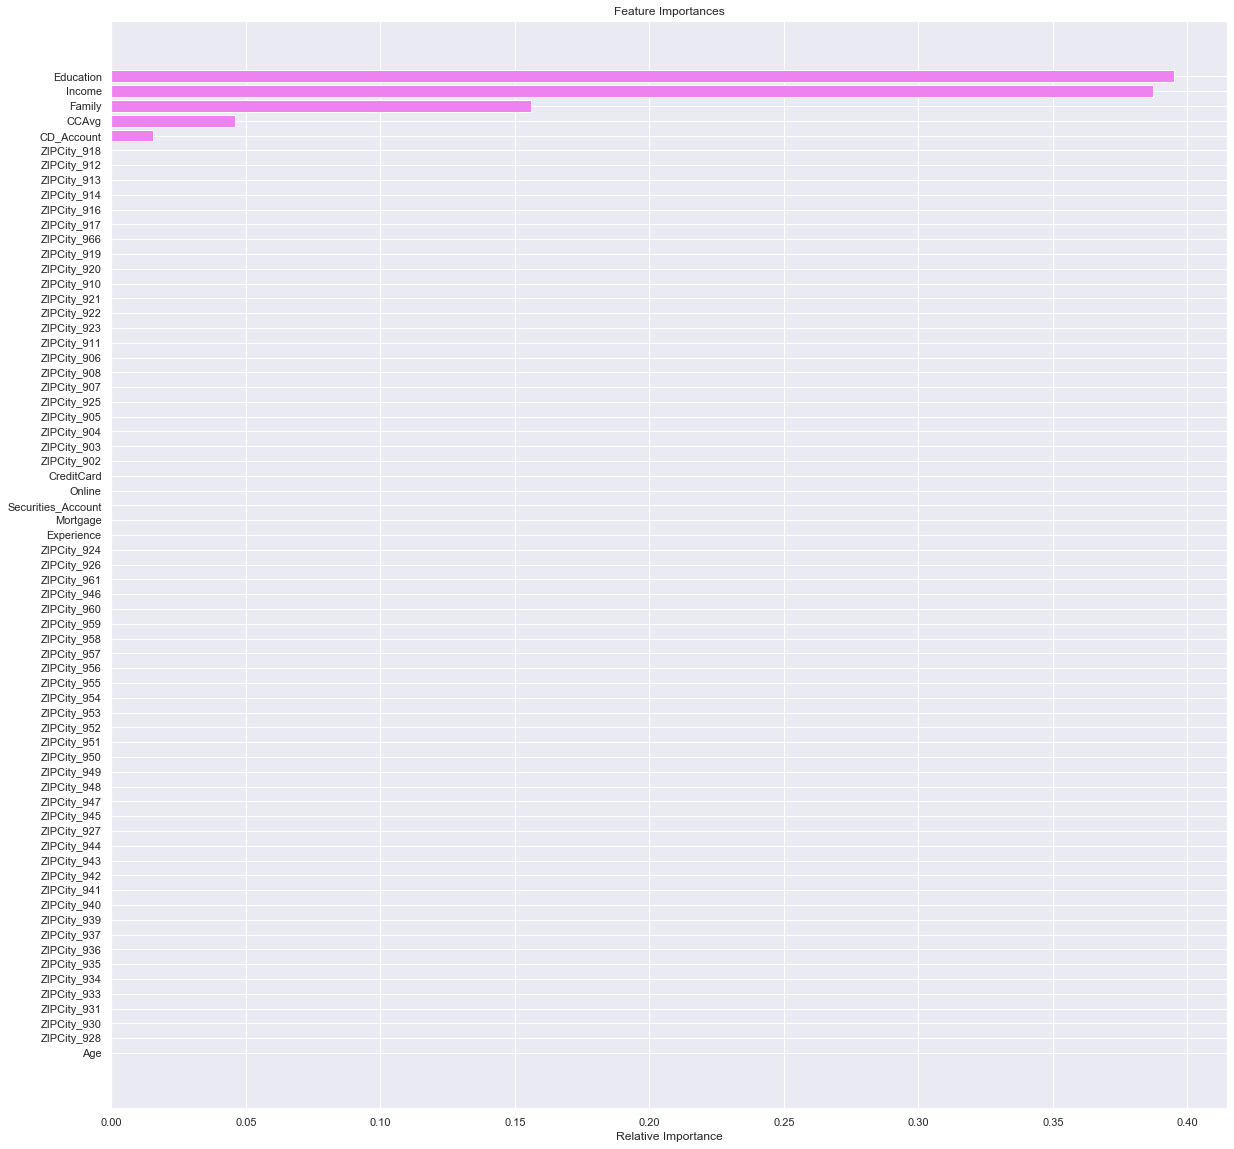

In [252]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see some features of previous model was lost. This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

### 7.2 Cost Complexity Pruning

In [253]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [254]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000217    0.001304
2     0.000292    0.003638
3     0.000313    0.004890
4     0.000317    0.005525
5     0.000444    0.006857
6     0.000444    0.007302
7     0.000483    0.008752
8     0.000500    0.009252
9     0.000580    0.012733
10    0.000637    0.014007
11    0.000685    0.016063
12    0.001000    0.017063
13    0.002508    0.024587
14    0.002580    0.027167
15    0.004751    0.031918
16    0.011105    0.043023
17    0.024311    0.067334
18    0.052848    0.173029

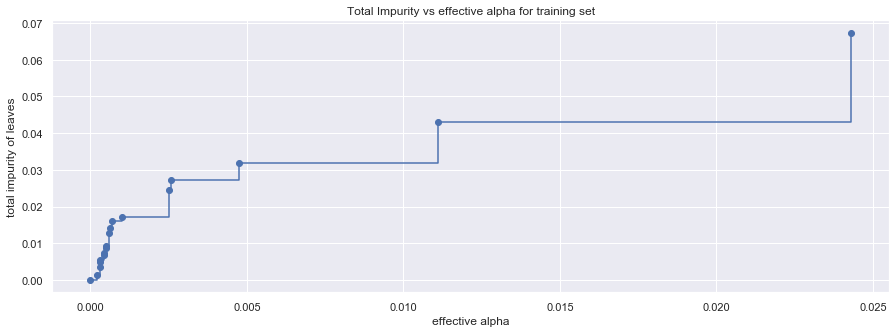

In [255]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [256]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05284766110239135



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

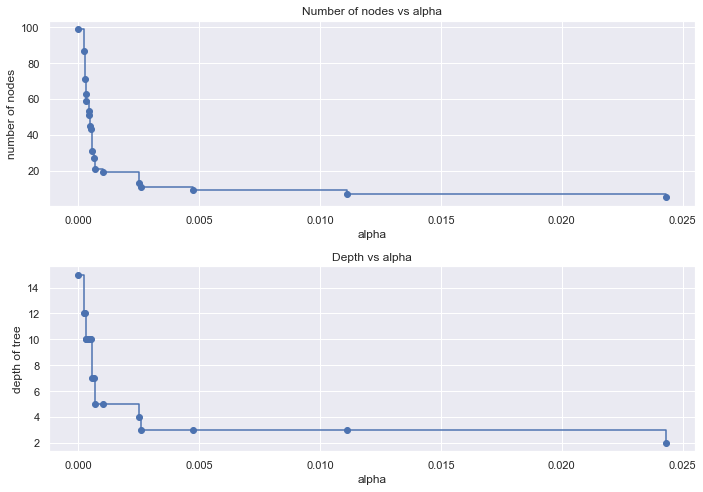

In [257]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [258]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(xtrain)
    values_train=metrics.recall_score(ytrain,pred_train3)
    recall_train.append(values_train)

In [259]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(xtest)
    values_test=metrics.recall_score(ytest,pred_test3)
    recall_test.append(values_test)

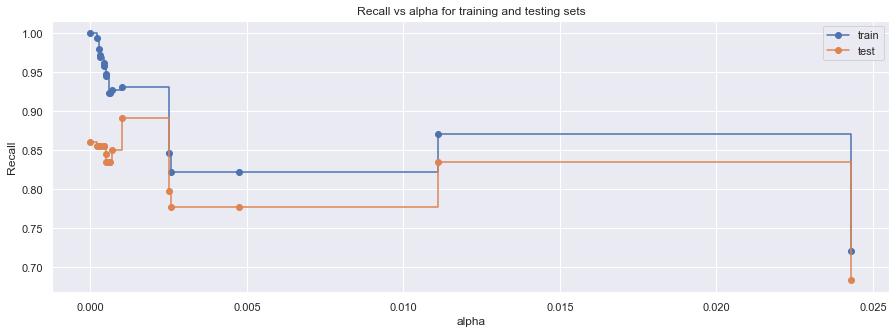

In [260]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.001 alpha*** 

In [261]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [262]:
get_recall_score_DT(best_model)

Recall on training set :  0.9303135888501742
Recall on test set :  0.8911917098445595


* With post-pruning we get the slightly less recall on both training and test set compared to Pre-Pruning.

## Confusion Matrix

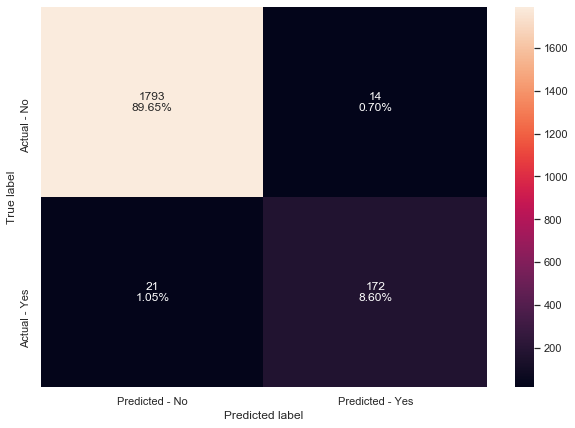

In [263]:
make_confusion_matrix_DT(best_model,ytest)

## Visualizing the Decision Tree

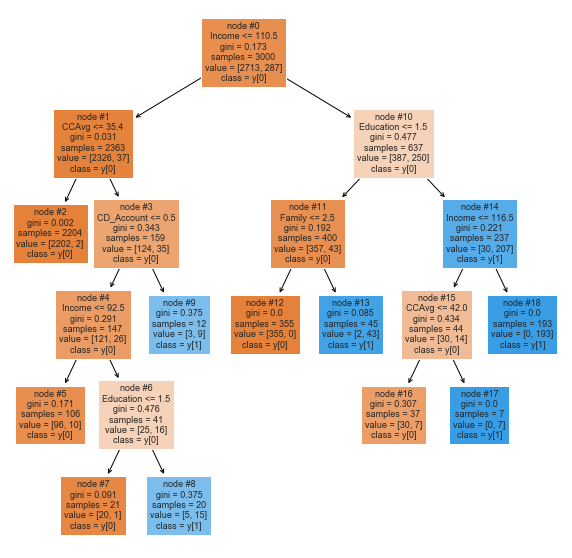

In [264]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [265]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 35.40
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  35.40
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 43.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 42.00
|   |   |   |   |--- weights: [30.00, 7.00] class: 0
|   |   |   |--- CCAvg >  42.00
|   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |--- Income >  116.50

In [266]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = xtrain.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.394775
Income              0.386771
Family              0.155873
CCAvg               0.047004
CD_Account          0.015577
Age                 0.000000
ZIPCity_940         0.000000
ZIPCity_945         0.000000
ZIPCity_944         0.000000
ZIPCity_943         0.000000
ZIPCity_942         0.000000
ZIPCity_941         0.000000
ZIPCity_936         0.000000
ZIPCity_939         0.000000
ZIPCity_937         0.000000
ZIPCity_947         0.000000
ZIPCity_935         0.000000
ZIPCity_934         0.000000
ZIPCity_933         0.000000
ZIPCity_946         0.000000
ZIPCity_950         0.000000
ZIPCity_948         0.000000
ZIPCity_949         0.000000
ZIPCity_930         0.000000
ZIPCity_951         0.000000
ZIPCity_952         0.000000
ZIPCity_953         0.000000
ZIPCity_954         0.000000
ZIPCity_955         0.000000
ZIPCity_956         0.000000
ZIPCity_957         0.000000
ZIPCity_958         0.000000
ZIPCity_959         0.000000
ZIPCity_960   

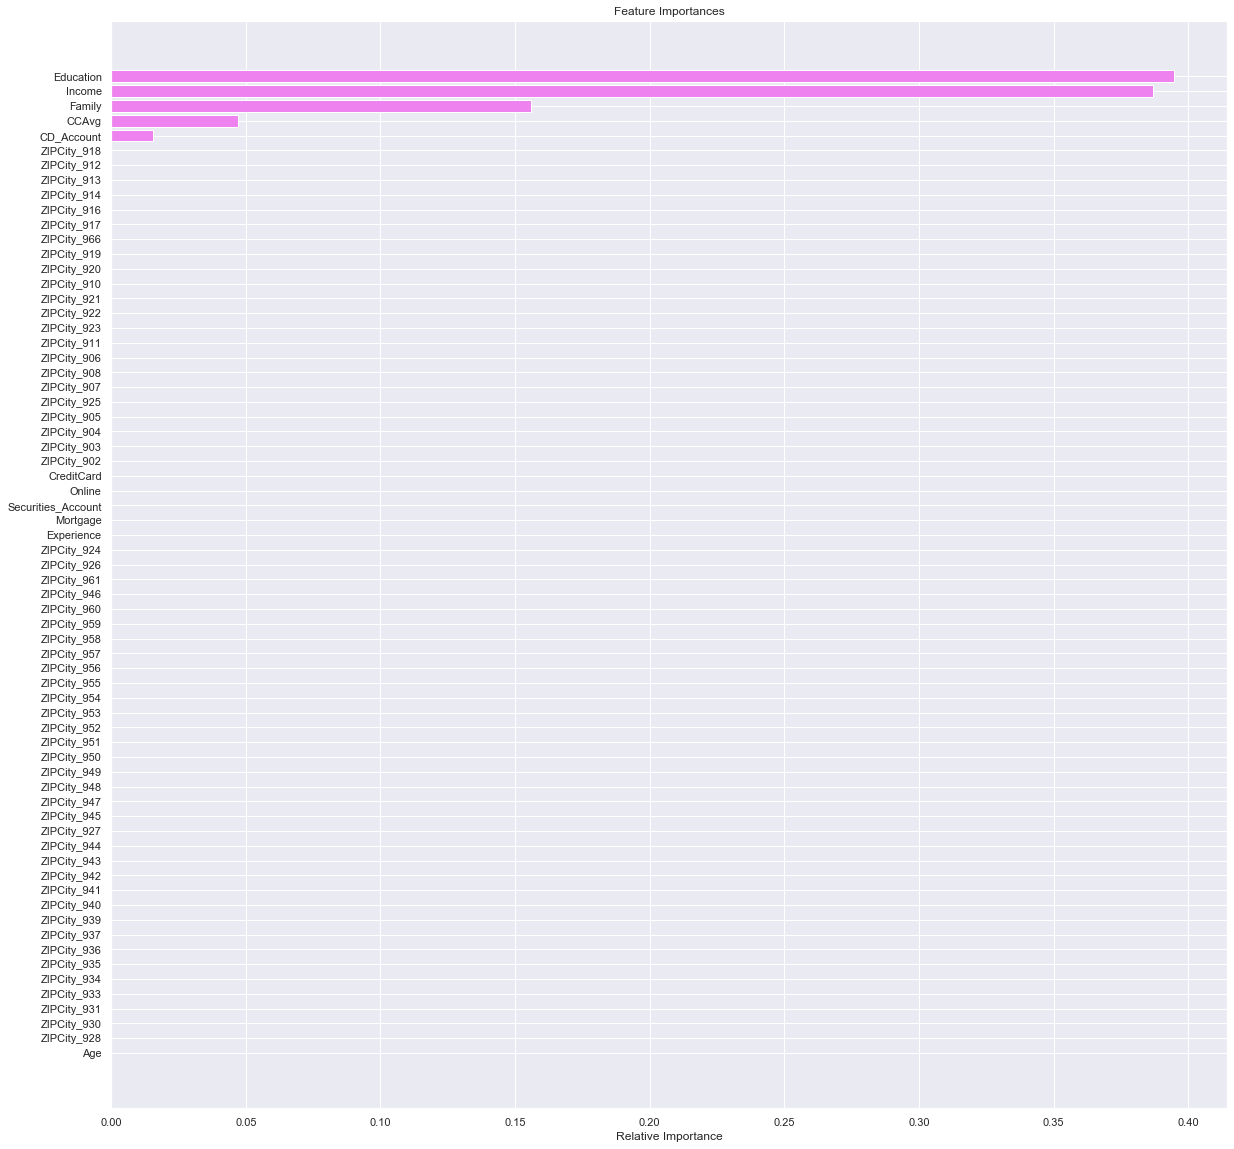

In [267]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education, income and family remain the most important top 3 feature with post-pruning too.

## Comparing all the decision tree models

In [268]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1.0,0.937,0.930], 'Test_Recall':[0.860,0.896,0.891]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0               Initial decision tree model         1.000        0.860
1  Decision tree with hyperparameter tuning         0.937        0.896
2           Decision tree with post-pruning         0.930        0.891

**Decision tree with pre-pruning is giving the highest recall on the test set**

### 8. Conclusion

- We analyzed the AllLife bank customer details using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to purchase a Personal loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Education, Income, Family, Credit card expenses and CD Account are the most important variable in predicting the customers who have higher probability of purchasing the loan.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### 9.Recommendations
- The banks can check with hightly educated customers as there is high probability of purchasing the personal loans.
- The banks can look for customers who are having CD account as there is high probability of purchasing the personal loans.
- The banks can encourage giving credit cards to customers so that their expenditures increases. So, high probability of purchasing the personal loans.
- The banks can target customers with high income to purchasing the personal loans.
- The banks can target customers having family for purchasing the personal loans.